# Final Project Submission

Please fill out:
* Student name: Deztany Jackson
* Student pace: DS Flex
* Scheduled project review date/time: March 23, 2023
* Instructor name: Morgan Jones
* Blog post URL: Dmvinedata.com

# Summary- 250 Words
    Business Problem -
    Data Understanding
    Data Preparation
    Modeling
    Evaluation
    Conclusion

A local hospital wants to explore their options in 

# Data Understanding


Write a few sentences on the approach to Data Understanding

In [182]:
import os # Getting data 
import glob #Google Collab
#from google.colab import drive #Google Collab

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.metrics import AUC, Accuracy,Precision,Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import models, layers, optimizers, activations
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import  VGG19 #Pretrained Transfer Modeling
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, f1_score, recall_score,accuracy_score, auc, log_loss
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score, make_scorer
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight 

import datetime

import pathlib
import shutil

import warnings
warnings.filterwarnings('ignore')
tf.__version__

import logging
tf.get_logger().setLevel(logging.ERROR)

# Showing the areas of the image
import lime
from lime import lime_base
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [3]:
#Time
original_start = datetime.datetime.now()
start = datetime.datetime.now()

In [4]:

#Current directory
cur_dir = os.getcwd()
cur_dir


'/Users/deztanyjackson/Documents/0_Flatiron/Phase_4/Project_4/Image_Classification_P4'

In [5]:
#Insert description on glob and what is happening

In [6]:
#Puling data in...already know the categories from the problem
train_data = glob.glob(os.path.join(cur_dir,'data/chest_xray/train/**/*.jpeg'))
val_data = glob.glob(os.path.join(cur_dir,'data/chest_xray/val/**/*.jpeg'))
test_data = glob.glob(os.path.join(cur_dir,'data/chest_xray/test/**/*.jpeg'))


print(f"Training Set has: {len(train_data)} images")
print(f"Validation Set has: {len(val_data)} images")
print(f"Testing Set has: {len(test_data)} images")



Training Set has: 4360 images
Validation Set has: 872 images
Testing Set has: 624 images


In [7]:
DIR = "../chest_xray/"
sets = ["train", "val", "test"]
all_pneumonia = []
all_normal = []

for cat in sets:
    path = os.path.join(DIR, cat)
    norm = glob.glob(os.path.join(path, "NORMAL/*.jpeg"))
    pneu = glob.glob(os.path.join(path, "PNEUMONIA/*.jpeg"))
    
    all_normal.extend(norm)
    all_pneumonia.extend(pneu)

print(f"Total Pneumonia Images: {len(all_pneumonia)}")
print(f"Total Normal Images: {len(all_normal)}")
print(f"Ratio of Normal/Pneumonia: {round(len(all_normal)/len(all_pneumonia),2)}")


Total Pneumonia Images: 4273
Total Normal Images: 1583
Ratio of Normal/Pneumonia: 0.37


In [8]:
#Pulling in Normal and Pneumonia specific data
v_pneu = glob.glob(os.path.join(cur_dir,'data/chest_xray/val/PNEUMONIA/*.jpeg'))
v_norm = glob.glob(os.path.join(cur_dir,'data/chest_xray/val/NORMAL/*.jpeg'))
t_norm = glob.glob(os.path.join(cur_dir,'data/chest_xray/train/NORMAL/*.jpeg'))
t_pneu = glob.glob(os.path.join(cur_dir,'data/chest_xray/train/PNEUMONIA/*.jpeg'))
test_norm = glob.glob(os.path.join(cur_dir,'data/chest_xray/test/NORMAL/*.jpeg'))
test_pneu = glob.glob(os.path.join(cur_dir,'data/chest_xray/test/PNEUMONIA/*.jpeg'))

### Initial Data Balancing 

- Orinally started with 16 Validation Images
- Moving validation images to train set.
- Perform Random Train/Valid split 80/20 on Normal and Pneumonia images
- Move 20% of each back to validation folder

In [9]:
#Moving Validation to Test
cat = [v_norm,v_pneu]

for c in cat:
    if c == v_norm:
        images = [f for f in v_norm if '.jpeg' in f.lower()] 
        for img in images:
            new_path = os.path.join(cur_dir,"data/chest_xray/train/NORMAL/")
            shutil.move(img,new_path)
    elif c == v_pneu:
        images = [f for f in v_pneu if '.jpeg' in f.lower()] 
        for img in images:
            new_path = os.path.join(cur_dir,"data/chest_xray/train/PNEUMONIA/")
            shutil.move(img,new_path)
    else:
        pass


In [10]:
train_cat = [t_norm,t_pneu]

for cat in train_cat:
    train,val = train_test_split(cat, train_size=.8, random_state=42)
    if cat == t_norm:
        for img in val:
            new_path = os.path.join(cur_dir,"data/chest_xray/val/NORMAL/")
            shutil.move(img,new_path)
    elif cat == t_pneu:
        for img in val:
            new_path = os.path.join(cur_dir,"data/chest_xray/val/PNEUMONIA/")
            shutil.move(img,new_path)
    else:
        pass
    

In [11]:
v_pneu = glob.glob(os.path.join(cur_dir,'data/chest_xray/val/PNEUMONIA/*.jpeg'))
v_norm = glob.glob(os.path.join(cur_dir,'data/chest_xray/val/NORMAL/*.jpeg'))
t_norm = glob.glob(os.path.join(cur_dir,'data/chest_xray/train/NORMAL/*.jpeg'))
t_pneu = glob.glob(os.path.join(cur_dir,'data/chest_xray/train/PNEUMONIA/*.jpeg'))
test_norm = glob.glob(os.path.join(cur_dir,'data/chest_xray/test/NORMAL/*.jpeg'))
test_pneu = glob.glob(os.path.join(cur_dir,'data/chest_xray/test/PNEUMONIA/*.jpeg'))

In [12]:

print(f"Training Set has: {len(train_data)} images")
print(f"Testing Set has: {len(test_data)} images")
print(f"Validation Set has: {len(val_data)} images")


Training Set has: 4360 images
Testing Set has: 624 images
Validation Set has: 872 images


In [13]:
print(f"Validation Pneumonia Amount: {len(v_pneu)} images")
print(f"Validation Normal Amount: {len(v_norm)} images")
print(f"Validation Normal to Pneumonia Ratio: {round(len(v_norm)/len(v_pneu),2)}")


Validation Pneumonia Amount: 648 images
Validation Normal Amount: 225 images
Validation Normal to Pneumonia Ratio: 0.35


There is still imbalance but better offset.

### Graph of Pneumonia to Normal count (All, Train, Val, Test)

In [14]:
# Will do

### Normal and Pneumonia Images

<b> NORMAL IMAGES

Sample of Random Normal Pictures


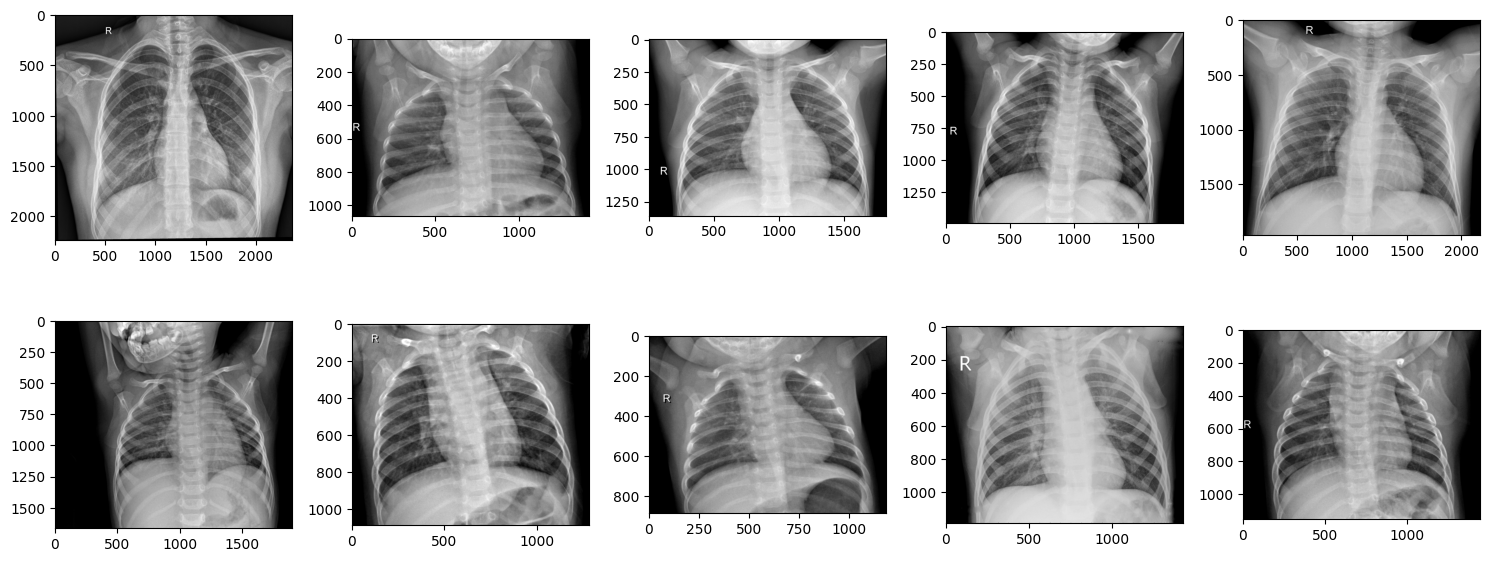

In [15]:
plt.figure(figsize = (15,15))
print ("Sample of Random Normal Pictures")
for i in range(10):
    plt.subplot(5,5,i+1)
    img = plt.imread(t_norm[i])
    plt.imshow(img, cmap = "gray")
    plt.tight_layout()
    #plt.axis('off')

<b> PNEUMONIA IMAGES

Sample of Random Pneumonia Pictures


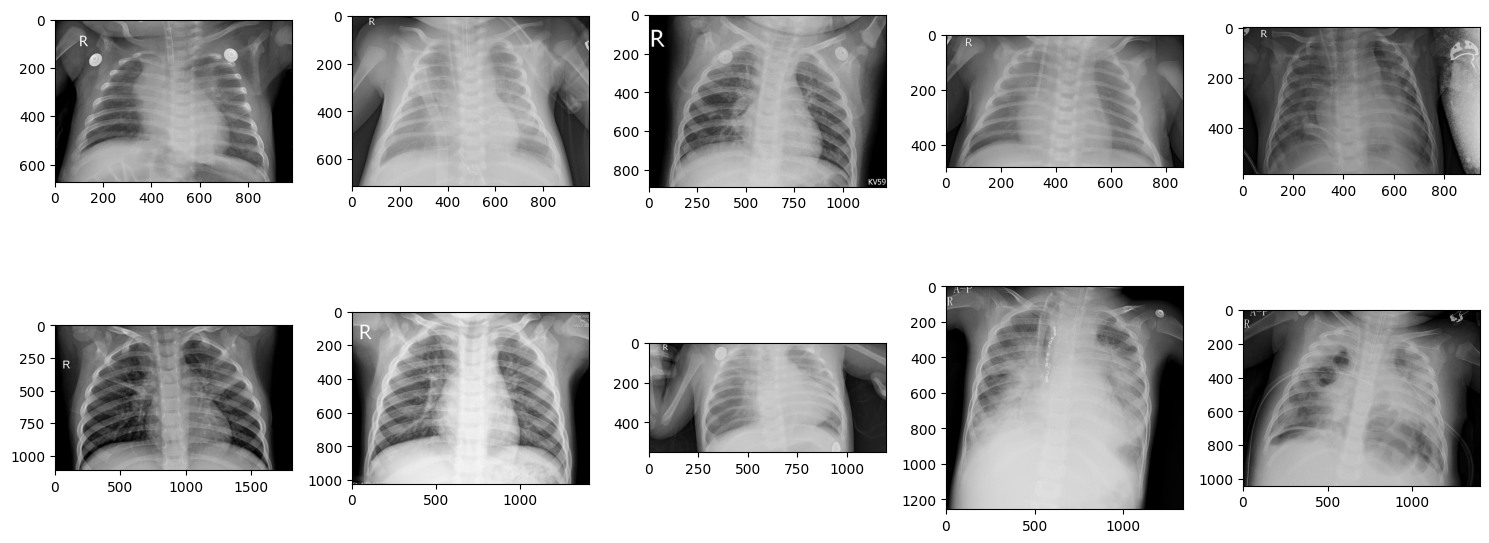

In [16]:
plt.figure(figsize = (15,15))
print ("Sample of Random Pneumonia Pictures")
for i in range(10):
    plt.subplot(5,5,i+1)
    img = plt.imread(t_pneu[i])
    plt.imshow(img, cmap = "gray")
    plt.tight_layout()
    #plt.axis('off')

Visually, both the Normal and Pneumonia pictures vary in size. Pneumonia pictures have a cloudier look.

## Preprocessing Images

#Rescaling the image [Rescaling](https://datascience.stackexchange.com/questions/92499/rescale-parameter-in-data-augmentation#:~:text=As%20rightly%20pointed%20out%20by,evenly%20to%20the%20total%20loss)

In [17]:
#ImageDataGenerator without pre data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
#Current Directories
train_directory= 'data/chest_xray/train'
validation_directory= 'data/chest_xray/val'
test_directory = 'data/chest_xray/test'


### Image Generator

Describe:
- Target Size
- Batch Size
- Class Mode
- Shuffle

In [19]:
#Using a generator for the images to work with.
train_gen = train_datagen.flow_from_directory(train_directory,
                                                   target_size = (224, 224),
                                                   batch_size=64,
                                                   classes = ["NORMAL","PNEUMONIA"],
                                                   class_mode = 'binary',
                                                   
                                                   seed = 42)

val_gen = val_datagen.flow_from_directory(validation_directory,
                                                      target_size = (224, 224),
                                                      batch_size = 32,
                                                      classes = ["NORMAL","PNEUMONIA"],
                                                      class_mode = 'binary',
                                                      seed = 42)
test_gen = test_datagen.flow_from_directory(test_directory,
                                                      target_size = (224, 224),
                                                      batch_size = 32,
                                                      classes = ["NORMAL","PNEUMONIA"],
                                                      class_mode = 'binary',
                                                      seed = 42,
                                                      shuffle= False)                                                      

Found 4359 images belonging to 2 classes.
Found 873 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [20]:
#Checking the class label and index match
print(train_gen.class_indices)
print(val_gen.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}
{'NORMAL': 0, 'PNEUMONIA': 1}


Iterating through the generated images.
X and y are the images and labels respectively. It is a sample equal to the batch size above.

In [21]:
X_train, y_train = next(train_gen)
X_test, y_test = next(test_gen)
X_val, y_val = next(val_gen)

In [22]:
"""# Plot the count fo the Pneumonia for All and Training using the X and y

labels = [ "Pneumonia", "Normal"]
values = [len(all_pneumonia), len(all_normal) ]
colors = ["orange", "blue"]
print(values)
sns.countplot(x = values, label = labels)

#Distribution of Category Variables
fig,ax=plt.subplots(figsize=(8,8), facecolor = "white")
sns.countplot(x = "Category", data=train_gen)
plt.title('Distribution of Categories on Data')
plt.grid(axis = "y")
plt.show()
fig.savefig("images/dist.png", dpi=150)"""

'# Plot the count fo the Pneumonia for All and Training using the X and y\n\nlabels = [ "Pneumonia", "Normal"]\nvalues = [len(all_pneumonia), len(all_normal) ]\ncolors = ["orange", "blue"]\nprint(values)\nsns.countplot(x = values, label = labels)\n\n#Distribution of Category Variables\nfig,ax=plt.subplots(figsize=(8,8), facecolor = "white")\nsns.countplot(x = "Category", data=train_gen)\nplt.title(\'Distribution of Categories on Data\')\nplt.grid(axis = "y")\nplt.show()\nfig.savefig("images/dist.png", dpi=150)'

# Modeling


### Custom Functions for Modeling


[Visualization Metrics,A.Jang 2023](https://www.kaggle.com/code/amyjang/tensorflow-pneumonia-classification-on-x-rays#8.-Visualizing-model-performance)

In [ ]:
#Pickle saving
def save_file(name,file):
    with open(name, 'wb') as f:
        pickle.dump(file, f)


In [ ]:
#loading file
def load_file(name):
    with open(name, 'rb') as f:
        file = pickle.load(f)
    return file

In [23]:
def eval_metrics(history):
    """ Enter Docstring information Plotting the accuracy and the loss of the training and validation model"""
    
    fig, ax = plt.subplots(1,4, figsize = (25,5))
    fig.suptitle('Model Metrics Results')
    
    metrics = ["acc","loss","recall","precision"]   
    
    for i, metric in enumerate(metrics):
    
        ax[i].plot(history.history[metric])
        ax[i].plot(history.history["val_" + metric])
        ax[i].set_title('Model {}'.format(metric))
        ax[i].set_ylabel(metric)
        ax[i].set_xlabel("Epochs")
        ax[i].legend(['train', 'val'])

        

[Predictor Algorithm with Shuffle,by Jakob, 2021](https://stackoverflow.com/questions/45413712/keras-get-true-labels-y-test-from-imagedatagenerator-or-predict-generator/67282636#67282636)

In [24]:
def predict_results(model, generator):
    """Generator with shuffle = True"""
    
    # Create lists for storing the predictions and labels
    predictions = []
    labels = []

    # Get the total number of labels in generator 
    # (i.e. the length of the dataset where the generator generates batches from)
    n = len(generator.labels)

    # Loop over the generator
    for data, label in generator:
        # Make predictions on data using the model. Store the results.
        predictions.extend(model.predict(data).flatten())

        # Store corresponding labels
        labels.extend(label)

        # We have to break out from the generator when we've processed 
        # the entire once (otherwise we would end up with duplicates). 
        if (len(label) < generator.batch_size) and (len(predictions) == n):
            break
        return labels, predictions #y_true, y_hat_train/y_pred

In [25]:
def conf_matrix(y_true,y_pred, norm_bool):
    
    y_pred = np.round(y_pred,0) #Rounding to the nearest 0 or 1, assumes threshold is >.5 for
    cmatrix= cm(y_true, y_pred, normalize=norm_bool)
    matrix_disp= ConfusionMatrixDisplay(cmatrix, display_labels= ["NORMAL", "PNUEMONIA"])
    matrix_disp.plot()

    plt.xlabel('Predictions')
    plt.ylabel('Actual')
    plt.title('Model Confusion Matrix')
    plt.show()
    

In [203]:
def eval_report(y_true, y_pred,gen,history):
    
    y_pred = np.round(y_pred,0) # Rounding to the nearest 0 or 1
    #Display Precision, Recall, F1 and Accuracy
    print(classification_report(y_true, y_pred))
    print('\n')
    
    #Display Model Metrics
    loss, acc,_,_ = history.model.evaluate(gen)
   
    print(f'Loss: {np.round(loss,4)}')
   


In [27]:
# set up the class weights using y_train
def calc_weight(labels):
    """ Setting the weights and pairing it with the classes for the class weight paramters in model.fit. 
    Labels can also be thought of as y_train"""
    classes = [0,1]
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=labels)
    class_weights = dict(zip(classes, weights))
    return class_weights

In [28]:
#If needed create plots
# def plot_roc_auc():
# def plot_precision_recall():

Write out the layout of each modeling iteration
- sequence <br>
- compile <br>
- summary <br>
- fit <br>
- predict <br>
- conf_matrix <br>
- eval report <br>
- Each iteration will have slight changes for improvement.  They will be described more at the
- General descriptions of  iterations

# Baseline Modeling (1)

Describe the main model hyperparameters and data parameters
- model sequence layers, filter, activation 



In [29]:
baseline = models.Sequential([
Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
       padding = 'same', input_shape=(224,224,3)),
MaxPooling2D(pool_size=(2, 2), strides=2), 
    
Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
       padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),
    
Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
       padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),
Flatten(),
Dense(units=64, activation='relu'),    
Dense(units=1, activation='sigmoid'),
])

Metal device set to: Apple M2 Max


2023-03-26 17:09:17.718508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-26 17:09:17.718669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
#Compile
baseline.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=["acc","Recall","Precision"])

In [31]:
baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 96)       0

In [32]:
#describe the learned parameters in summary - DeepLizard

In [33]:
#Fit
history = baseline.fit(train_gen,
                       epochs=10,
                       verbose = 2,
                       validation_data=val_gen)

Epoch 1/10


2023-03-26 17:09:18.261961: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-26 17:09:18.567546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 17:09:41.229400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 - 27s - loss: 0.3657 - acc: 0.8548 - recall: 0.9036 - precision: 0.9010 - val_loss: 0.1405 - val_acc: 0.9553 - val_recall: 0.9738 - val_precision: 0.9663 - 27s/epoch - 395ms/step
Epoch 2/10
69/69 - 25s - loss: 0.1056 - acc: 0.9628 - recall: 0.9753 - precision: 0.9747 - val_loss: 0.1046 - val_acc: 0.9645 - val_recall: 0.9660 - val_precision: 0.9858 - 25s/epoch - 365ms/step
Epoch 3/10
69/69 - 25s - loss: 0.0802 - acc: 0.9686 - recall: 0.9790 - precision: 0.9787 - val_loss: 0.1241 - val_acc: 0.9633 - val_recall: 0.9676 - val_precision: 0.9828 - 25s/epoch - 364ms/step
Epoch 4/10
69/69 - 25s - loss: 0.0698 - acc: 0.9729 - recall: 0.9802 - precision: 0.9833 - val_loss: 0.1362 - val_acc: 0.9588 - val_recall: 0.9769 - val_precision: 0.9679 - 25s/epoch - 364ms/step
Epoch 5/10
69/69 - 25s - loss: 0.0552 - acc: 0.9784 - recall: 0.9858 - precision: 0.9852 - val_loss: 0.1002 - val_acc: 0.9714 - val_recall: 0.9861 - val_precision: 0.9756 - 25s/epoch - 358ms/step
Epoch 6/10
69/69 - 25s - loss: 

<b> Baseline Metrics

In [217]:
def load_file(name):
    with open(name, 'rb') as f:
        file = pickle.load(f)
    return file

[0.8547832369804382,
 0.9628355503082275,
 0.9685707688331604,
 0.9729295969009399,
 0.9784354567527771,
 0.9862353801727295,
 0.9917412400245667,
 0.9915118217468262,
 0.9951823949813843,
 0.9965588450431824]

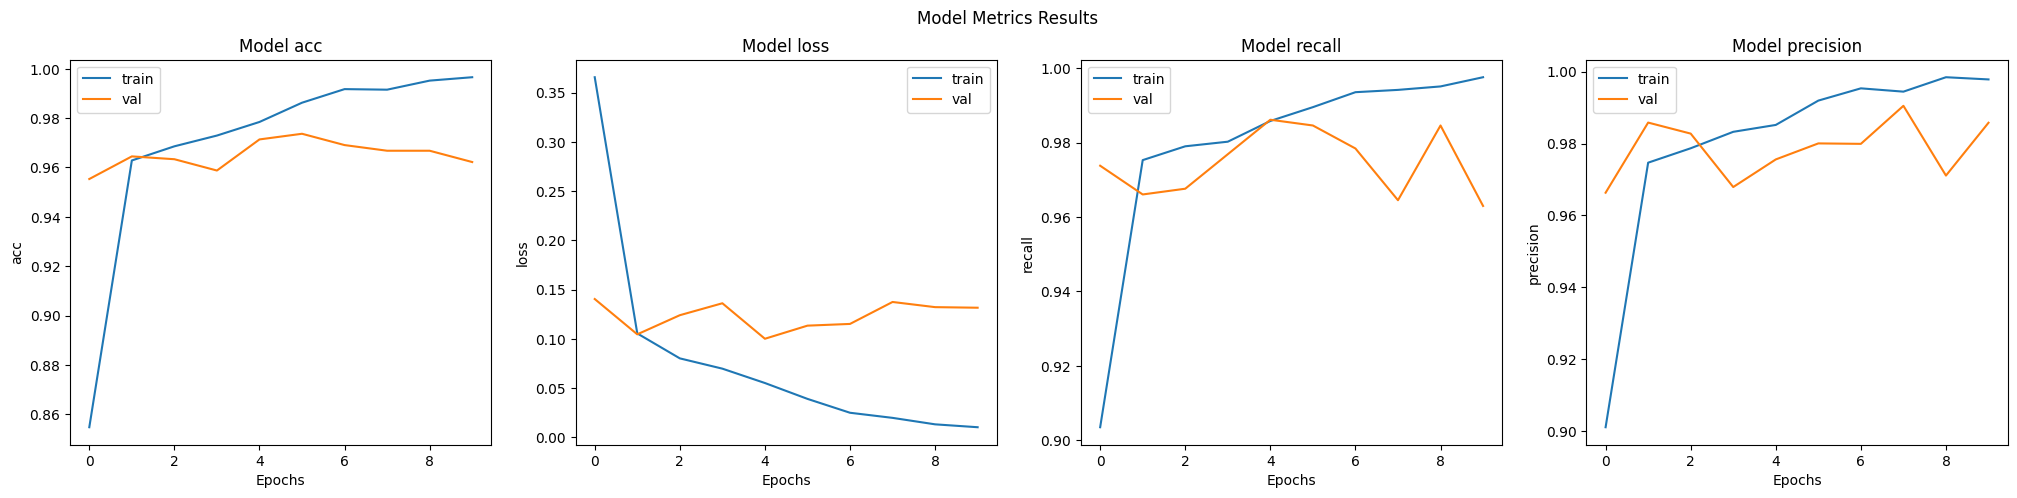

In [34]:
#Plotting chosen metrics V
eval_metrics(history)

In [35]:
train_labels, train_predictions = predict_results(baseline,train_gen)
val_labels, val_predictions = predict_results(baseline,val_gen)

2/2 [==============================] - 0s 28ms/step


2023-03-26 17:13:31.303224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step


Training Confusion Matrices:



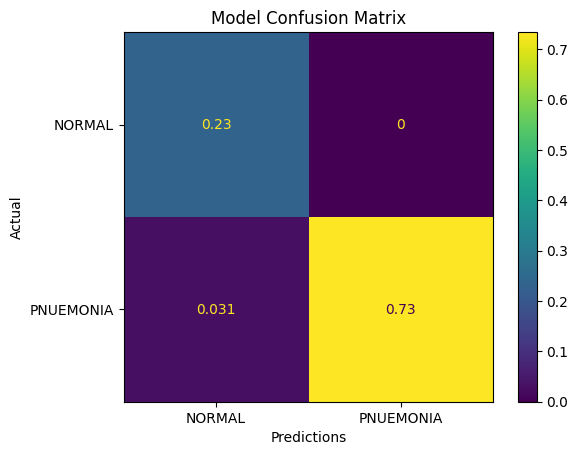

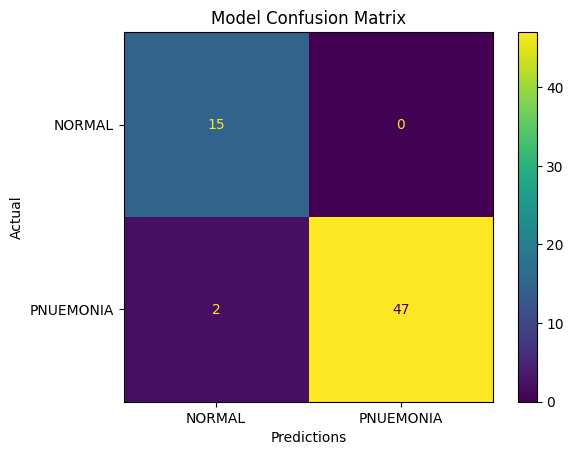

Validation Confusion Matrices:



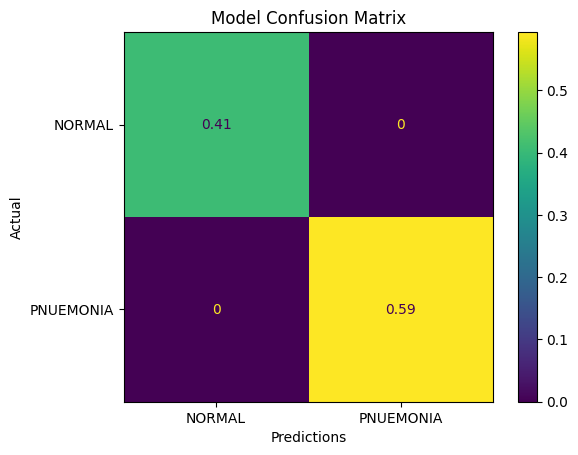

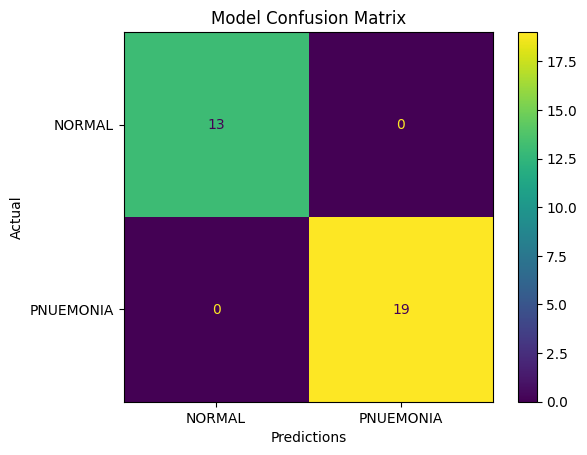

In [36]:
#Printing regular and normalized Confusion Matrices
print("Training Confusion Matrices:\n")
conf_matrix(train_labels,train_predictions, "all")
conf_matrix(train_labels,train_predictions, None)
print("Validation Confusion Matrices:\n")
conf_matrix(val_labels, val_predictions, "all")
conf_matrix(val_labels, val_predictions, None)

In [190]:
#Training Classification Report
print("Training Classificaiton Report:\n")
eval_report(train_labels,train_predictions,train_gen,history)

Training Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.77      1.00      0.87        49

    accuracy                           0.77        64
   macro avg       0.38      0.50      0.43        64
weighted avg       0.59      0.77      0.66        64



69/69 [==============================] - 21s 301ms/step - loss: 0.0175 - acc: 0.9936 - recall: 0.9913 - precision: 1.0000
Loss: 0.018
F1: 0.996


In [38]:
#Validation Classification Report
print("Validation Classificaiton Report:\n")
eval_report(val_labels,val_predictions,val_gen,history)

Validation Classificaiton Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



28/28 [==============================] - 4s 142ms/step - loss: 0.1317 - acc: 0.9622 - recall: 0.9630 - precision: 0.9858
Loss: 0.131658673286438


Epoch 4 Diverging

# Baseline Model with Class Weights 

Adding class weights to see it helps with class imbalance.


In [39]:

baseline2 = models.Sequential([
Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
       padding = 'same', input_shape=(224,224,3)),
MaxPooling2D(pool_size=(2, 2), strides=2), 
    
Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
       padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),
    
Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
       padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),
Flatten(),
Dense(units=64, activation='sigmoid'),    
Dense(units=1, activation='sigmoid'),
])

In [40]:
#Run the others the sames as the baseline and look at the results...What is your assessment? Make an action

In [41]:
baseline2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=["acc","Recall","Precision"]
                 )

In [42]:
#Calculating class weights for imbalance
class_weights = calc_weight(y_train)
class_weights

{0: 1.5238095238095237, 1: 0.7441860465116279}

In [43]:
history2 = baseline2.fit(train_gen,
                       epochs=1,
                       verbose = 2,
                       class_weight=class_weights,
                       validation_data=val_gen)

2023-03-26 17:13:57.599270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 17:14:18.019749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 - 25s - loss: 0.3364 - acc: 0.8502 - recall: 0.8572 - precision: 0.9356 - val_loss: 0.1508 - val_acc: 0.9485 - val_recall: 0.9506 - val_precision: 0.9793 - 25s/epoch - 361ms/step


In [44]:
baseline2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 96)      

Basline Evaluation Metrics :



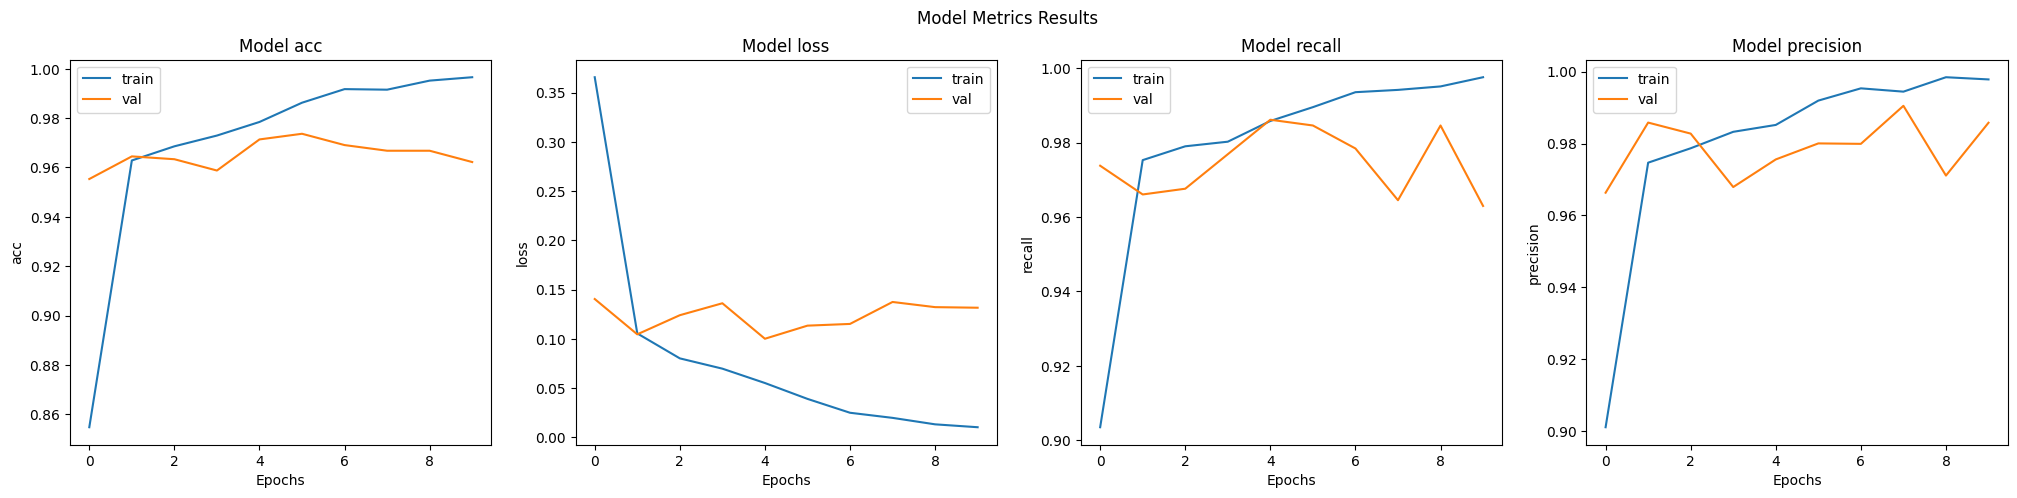

In [45]:
print("Basline Evaluation Metrics :\n")
eval_metrics(history)


Basline Evaluation Metrics w/ Class Weights :



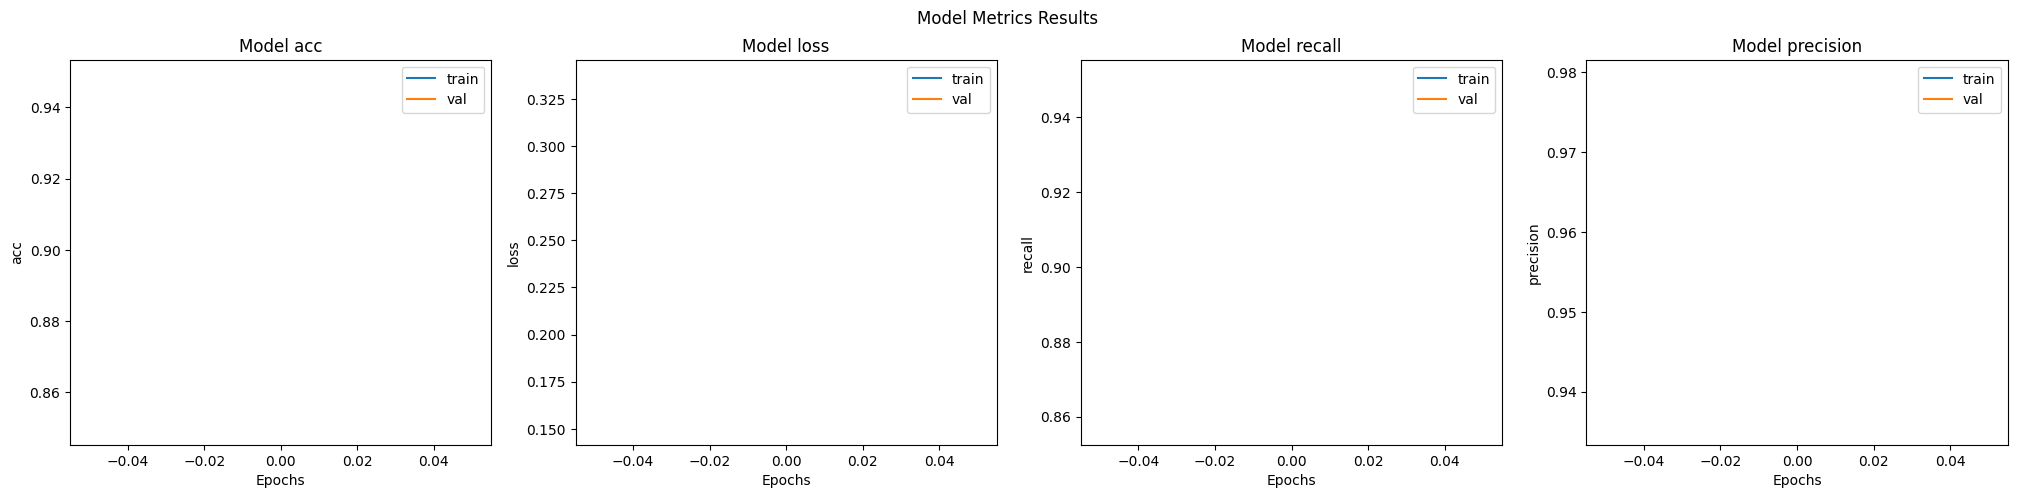

In [187]:
print("Basline Evaluation Metrics w/ Class Weights :\n")
eval_metrics(history2)

Drastic impovement with the class weight, but still includes high variation with recall and precision. The concludes that the model is still overfitting. Epoch 2 has the best Recall. The models start to diverage at Epoch 5.

In [47]:
train_labels, train_predictions = predict_results(baseline2,train_gen)
val_labels, val_predictions = predict_results(baseline2,val_gen)

2/2 [==============================] - 0s 33ms/step


2023-03-26 17:14:23.072511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step


Training Confusion Matrices:



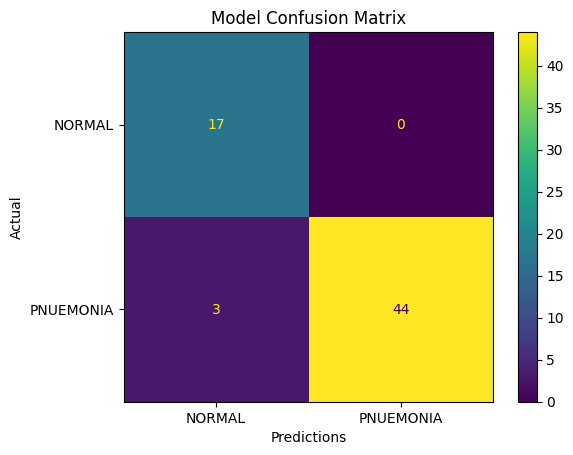

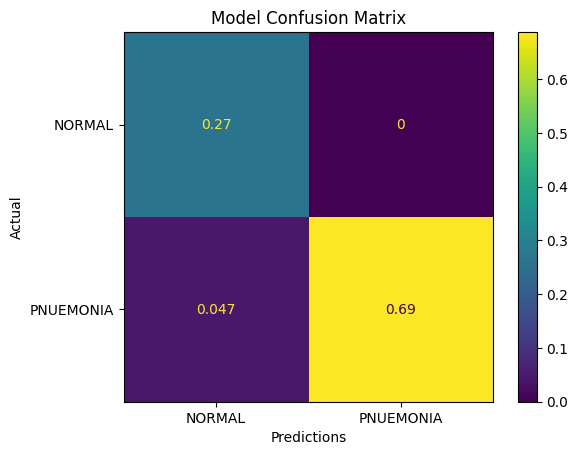

Validation Confusion Matrices:



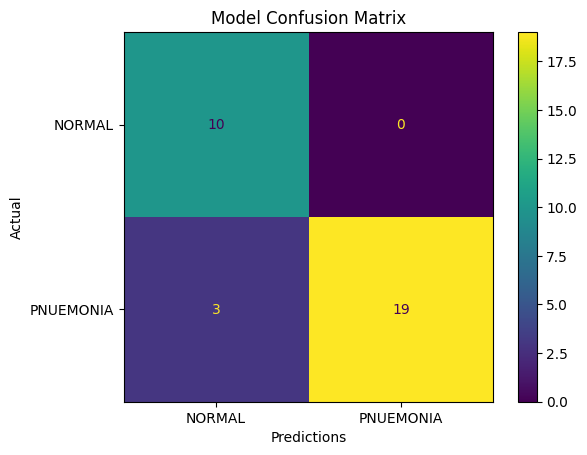

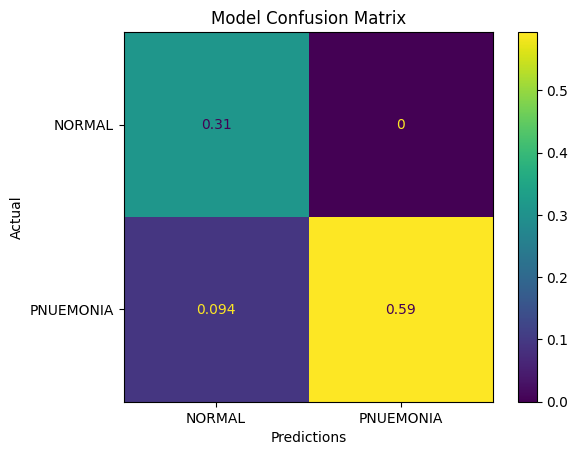

In [48]:
#Printing regular and normalized Confusion Matrices
print("Training Confusion Matrices:\n")
conf_matrix(train_labels,train_predictions, None)
conf_matrix(train_labels,train_predictions, "all")
print("Validation Confusion Matrices:\n")
conf_matrix(val_labels, val_predictions, None)
conf_matrix(val_labels, val_predictions, "all")

In [49]:
#Training Classification Report
print("Training Classificaiton Report:\n")
eval_report(train_labels,train_predictions,train_gen,history2)

Training Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        17
         1.0       1.00      0.94      0.97        47

    accuracy                           0.95        64
   macro avg       0.93      0.97      0.94        64
weighted avg       0.96      0.95      0.95        64



69/69 [==============================] - 20s 289ms/step - loss: 0.1294 - acc: 0.9521 - recall: 0.9499 - precision: 0.9849
Loss: 0.129405215382576


In [50]:
#Training Classification Report
print("Validation Classificaiton Report:\n")
eval_report(val_labels,val_predictions,val_gen,history2)

Validation Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87        10
         1.0       1.00      0.86      0.93        22

    accuracy                           0.91        32
   macro avg       0.88      0.93      0.90        32
weighted avg       0.93      0.91      0.91        32



28/28 [==============================] - 4s 143ms/step - loss: 0.1508 - acc: 0.9485 - recall: 0.9506 - precision: 0.9793
Loss: 0.15084192156791687


# Model Iteration 3

Describe the talk of hyperparameters to the Baseline version 2.
-Increasing Epochs to help with convergence
- Adding Earlystop at Epoch 5

- Dropout

In [51]:

model_3= models.Sequential([
Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
       padding = 'same', input_shape=(224,224,3)),
MaxPooling2D(pool_size=(2, 2), strides=2), 
    
Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
       padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),
    
Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
       padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),
Flatten(),
Dense(units=64, activation='sigmoid'), 
Dropout(0.3),  
Dense(units=1, activation='sigmoid'),
])

In [52]:
model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=["acc","Recall","Precision"]
                 )

In [53]:
#Adding early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [54]:
history3 = model_3.fit(train_gen,
                       epochs=30,
                       verbose = 2,
                       class_weight=class_weights,
                       validation_data=val_gen,
                      callbacks = es)

Epoch 1/30


2023-03-26 17:14:48.737225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 17:15:09.194010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 - 25s - loss: 0.2804 - acc: 0.8752 - recall: 0.8841 - precision: 0.9442 - val_loss: 0.1472 - val_acc: 0.9519 - val_recall: 0.9645 - val_precision: 0.9705 - 25s/epoch - 362ms/step
Epoch 2/30
69/69 - 24s - loss: 0.1191 - acc: 0.9548 - recall: 0.9580 - precision: 0.9807 - val_loss: 0.1460 - val_acc: 0.9404 - val_recall: 0.9460 - val_precision: 0.9730 - 24s/epoch - 353ms/step
Epoch 3/30
69/69 - 25s - loss: 0.0910 - acc: 0.9681 - recall: 0.9688 - precision: 0.9880 - val_loss: 0.1078 - val_acc: 0.9633 - val_recall: 0.9630 - val_precision: 0.9873 - 25s/epoch - 361ms/step
Epoch 4/30
69/69 - 25s - loss: 0.0775 - acc: 0.9716 - recall: 0.9728 - precision: 0.9887 - val_loss: 0.0989 - val_acc: 0.9656 - val_recall: 0.9691 - val_precision: 0.9843 - 25s/epoch - 362ms/step
Epoch 5/30
69/69 - 25s - loss: 0.0666 - acc: 0.9759 - recall: 0.9759 - precision: 0.9915 - val_loss: 0.0944 - val_acc: 0.9691 - val_recall: 0.9722 - val_precision: 0.9859 - 25s/epoch - 361ms/step
Epoch 6/30
69/69 - 25s - loss: 

In [55]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 96)      

Basline Evaluation Metrics w/ Class Weights :



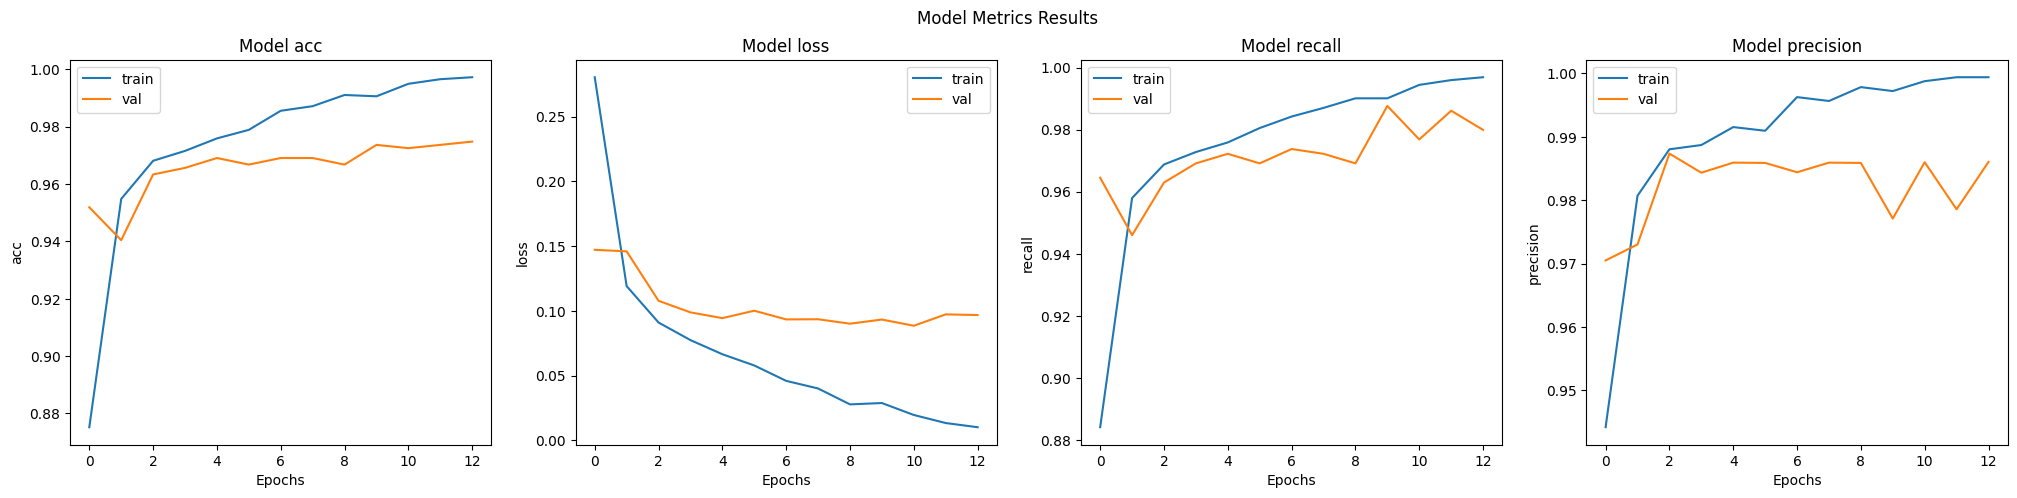

In [56]:
print("Basline Evaluation Metrics w/ Class Weights :\n")
eval_metrics(history3)

In [57]:
train_labels, train_predictions = predict_results(model_3,train_gen)
val_labels, val_predictions = predict_results(model_3,val_gen)

2/2 [==============================] - 0s 28ms/step


2023-03-26 17:20:12.940300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 12ms/step


Training Confusion Matrices:



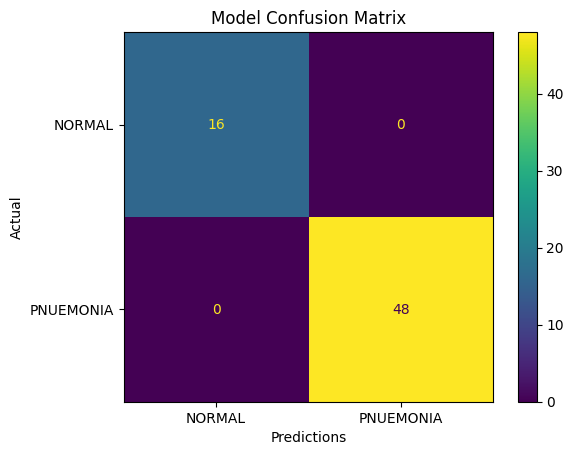

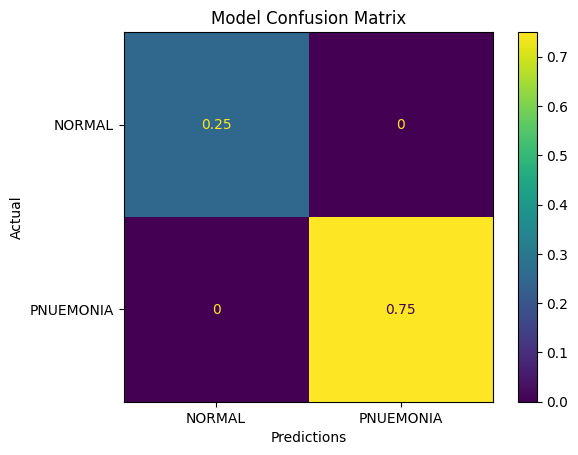

Validation Confusion Matrices:



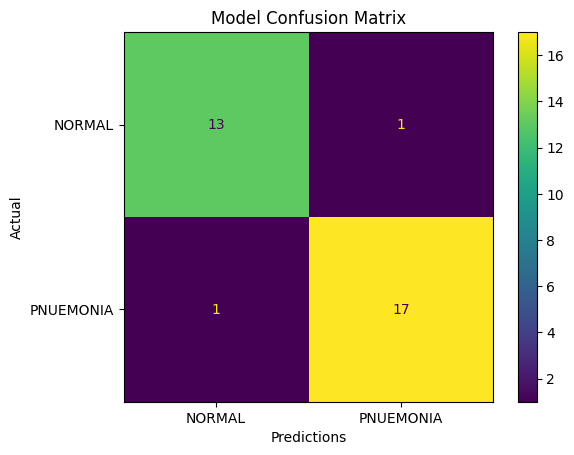

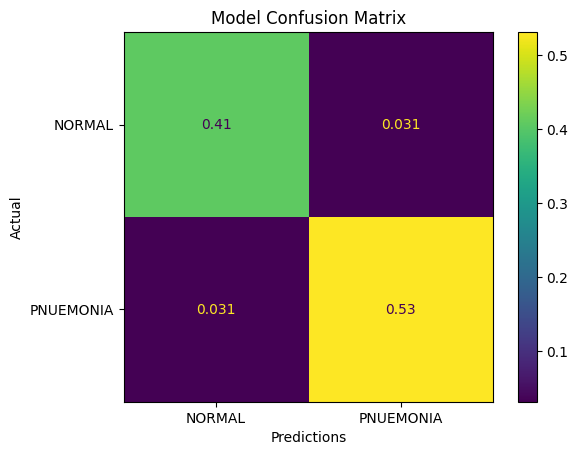

In [58]:
#Printing regular and normalized Confusion Matrices
print("Training Confusion Matrices:\n")
conf_matrix(train_labels,train_predictions, None)
conf_matrix(train_labels,train_predictions, "all")
print("Validation Confusion Matrices:\n")
conf_matrix(val_labels, val_predictions, None)
conf_matrix(val_labels, val_predictions, "all")

In [59]:
#Training Classification Report
print("Training Classificaiton Report:\n")
eval_report(train_labels,train_predictions,train_gen,history3)

Training Classificaiton Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



69/69 [==============================] - 20s 295ms/step - loss: 0.0068 - acc: 0.9984 - recall: 0.9981 - precision: 0.9997
Loss: 0.006761863362044096


In [60]:
#Training Classification Report
print("Validation Classificaiton Report:\n")
eval_report(val_labels,val_predictions,val_gen,history3)

Validation Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.94      0.94      0.94        18

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



28/28 [==============================] - 4s 141ms/step - loss: 0.0968 - acc: 0.9748 - recall: 0.9799 - precision: 0.9860
Loss: 0.09680493175983429


In [61]:
#Data Augmentation, Add Layers, Change optimization learning rate,

# Model 4 - X

Using gridsearch and keras wrappers to do some hyperparameter optimization
- Optimizer
- Learning Rate and Momentum
- Batch Size and Epochs
- Neurons


In [62]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [63]:

def buildModel():

    model= models.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
           padding = 'same', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2), 

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
        
    Flatten(),
    Dense(units=64, activation='sigmoid'), 
    Dropout(0.3),  
    Dense(units=1, activation='sigmoid'),])

    model.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=["acc","Recall","Precision"]
                 )
    return model

model_4.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=["acc","Recall","Precision"]
                 )

In [64]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [65]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)


In [75]:
batch_size = [32,64,96,128]
epochs = [30,45,60,90]
parameters = dict(batch_size=batch_size, epochs=epochs )


In [76]:
classifier = KerasClassifier(build_fn=buildModel, class_weight = class_weights)
#What hyperparameter we want to play with

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           refit = "Acc",
                           scoring = "accuracy",
                           cv = 3,return_train_score=True)
gs = grid_search.fit(X_train, y_train, verbose = 0)

2023-03-26 17:29:50.679886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:29:54.324764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 59ms/step


2023-03-26 17:29:54.852956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s

2023-03-26 17:29:58.317929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 66ms/step


2023-03-26 17:29:59.026991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 56ms/step


2023-03-26 17:30:02.585036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 17:30:03.112873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:30:07.960758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 56ms/step


2023-03-26 17:30:08.495126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:30:13.060325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 65ms/step


2023-03-26 17:30:13.591962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 60ms/step


2023-03-26 17:30:18.305386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 17:30:19.082898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:30:25.134202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 74ms/step


2023-03-26 17:30:25.716907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:30:31.893797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 93ms/step


2023-03-26 17:30:32.502101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 108ms/step


2023-03-26 17:30:38.869392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 84ms/step


2023-03-26 17:30:39.488908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 57ms/step


2023-03-26 17:30:48.035283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 17:30:48.823427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 58ms/step


2023-03-26 17:30:57.372172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 17:30:57.896873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:31:06.671922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 72ms/step


2023-03-26 17:31:07.234360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:31:10.259795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 93ms/step


2023-03-26 17:31:10.869338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 108ms/step


2023-03-26 17:31:14.094320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 81ms/step


2023-03-26 17:31:14.906462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 108ms/step


2023-03-26 17:31:18.174953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 77ms/step


2023-03-26 17:31:18.778092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 113ms/step


2023-03-26 17:31:22.735242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 77ms/step


2023-03-26 17:31:23.359112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:31:27.654911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 80ms/step


2023-03-26 17:31:28.504651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 105ms/step


2023-03-26 17:31:32.584361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 76ms/step


2023-03-26 17:31:33.187656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:31:38.227786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 101ms/step


2023-03-26 17:31:38.856218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:31:43.938898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 80ms/step


2023-03-26 17:31:44.544357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 111ms/step


2023-03-26 17:31:49.776308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 78ms/step


2023-03-26 17:31:50.643821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 122ms/step


2023-03-26 17:31:57.546231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 82ms/step


2023-03-26 17:31:58.156179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 112ms/step


2023-03-26 17:32:05.125179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 79ms/step


2023-03-26 17:32:05.736996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 108ms/step


2023-03-26 17:32:12.860873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 78ms/step


2023-03-26 17:32:13.472677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:32:16.490363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 82ms/step


2023-03-26 17:32:17.518263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 109ms/step


2023-03-26 17:32:20.776997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 79ms/step


2023-03-26 17:32:21.392731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:32:24.567232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 95ms/step


2023-03-26 17:32:25.182968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 112ms/step


2023-03-26 17:32:29.317700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 81ms/step


2023-03-26 17:32:30.158271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 114ms/step


2023-03-26 17:32:34.335109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 78ms/step


2023-03-26 17:32:34.969110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 110ms/step


2023-03-26 17:32:39.263494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 79ms/step


2023-03-26 17:32:39.887160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:32:44.878628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 94ms/step


2023-03-26 17:32:45.499369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 115ms/step


2023-03-26 17:32:50.834974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 80ms/step


2023-03-26 17:32:51.725173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:32:56.804268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 96ms/step


2023-03-26 17:32:57.424656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:33:04.417667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 85ms/step


2023-03-26 17:33:05.037325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 115ms/step


2023-03-26 17:33:12.378324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 83ms/step


2023-03-26 17:33:13.018840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 118ms/step


2023-03-26 17:33:20.311490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 83ms/step


2023-03-26 17:33:21.201034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:33:24.258430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 81ms/step


2023-03-26 17:33:24.866446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:33:28.089226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 80ms/step


2023-03-26 17:33:28.877074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:33:32.100280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 94ms/step


2023-03-26 17:33:32.926375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 113ms/step


2023-03-26 17:33:36.965009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 79ms/step


2023-03-26 17:33:37.592625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 112ms/step


2023-03-26 17:33:41.985479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 80ms/step


2023-03-26 17:33:42.612643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 115ms/step


2023-03-26 17:33:46.881157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 82ms/step


2023-03-26 17:33:47.501941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2023-03-26 17:33:52.654189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 94ms/step


2023-03-26 17:33:53.523383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 114ms/step


2023-03-26 17:33:58.661827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 80ms/step


2023-03-26 17:33:59.288814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 112ms/step


2023-03-26 17:34:04.552430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 79ms/step


2023-03-26 17:34:05.173542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 114ms/step


2023-03-26 17:34:12.154097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 80ms/step


2023-03-26 17:34:12.780966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 205ms/step


2023-03-26 17:34:19.809780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 101ms/step


2023-03-26 17:34:20.862473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 111ms/step


2023-03-26 17:34:27.911210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 76ms/step


2023-03-26 17:34:28.499125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [77]:
print("Best: %f using %s" % (gs.best_score_, gs.best_params_))

Best: 0.937229 using {'batch_size': 64, 'epochs': 45}


In [ ]:
# Plot Model 4 with chosen parameters

In [82]:

model_4= models.Sequential([
Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
       padding = 'same', input_shape=(224,224,3)),
MaxPooling2D(pool_size=(2, 2), strides=2), 
    
Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
       padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),
    
Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
       padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),
    
Flatten(),  
Dense(units=64, activation='sigmoid'),
Dropout(0.3),    
Dense(units=1, activation='sigmoid'),
])

In [83]:
model_4.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=["acc","Recall","Precision"]
                 )

In [84]:
history4 = model_4.fit(train_gen,
                       epochs=45,
                       verbose = 2,
                       class_weight=class_weights,
                       validation_data=val_gen,
                      callbacks = es) #stopping early because of time resources

Epoch 1/45


2023-03-26 17:46:46.503771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 17:47:08.400995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 - 27s - loss: 0.3467 - acc: 0.8316 - recall: 0.8402 - precision: 0.9261 - val_loss: 0.1374 - val_acc: 0.9519 - val_recall: 0.9568 - val_precision: 0.9779 - 27s/epoch - 389ms/step
Epoch 2/45
69/69 - 25s - loss: 0.1280 - acc: 0.9532 - recall: 0.9552 - precision: 0.9813 - val_loss: 0.1502 - val_acc: 0.9370 - val_recall: 0.9228 - val_precision: 0.9917 - 25s/epoch - 362ms/step
Epoch 3/45
69/69 - 26s - loss: 0.0978 - acc: 0.9654 - recall: 0.9666 - precision: 0.9864 - val_loss: 0.1063 - val_acc: 0.9679 - val_recall: 0.9815 - val_precision: 0.9755 - 26s/epoch - 371ms/step
Epoch 4/45
69/69 - 25s - loss: 0.0830 - acc: 0.9674 - recall: 0.9679 - precision: 0.9880 - val_loss: 0.1025 - val_acc: 0.9714 - val_recall: 0.9830 - val_precision: 0.9785 - 25s/epoch - 366ms/step
Epoch 5/45
69/69 - 25s - loss: 0.0727 - acc: 0.9745 - recall: 0.9762 - precision: 0.9893 - val_loss: 0.1374 - val_acc: 0.9450 - val_recall: 0.9336 - val_precision: 0.9918 - 25s/epoch - 369ms/step
Epoch 6/45
69/69 - 26s - loss: 

In [85]:
model_4.summary()

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_273 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_275 (MaxPooli  (None, 112, 112, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_274 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_276 (MaxPooli  (None, 56, 56, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_275 (Conv2D)         (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_277 (MaxPooli  (None, 28, 28, 96)     

Basline Evaluation Metrics w/ Class Weights :



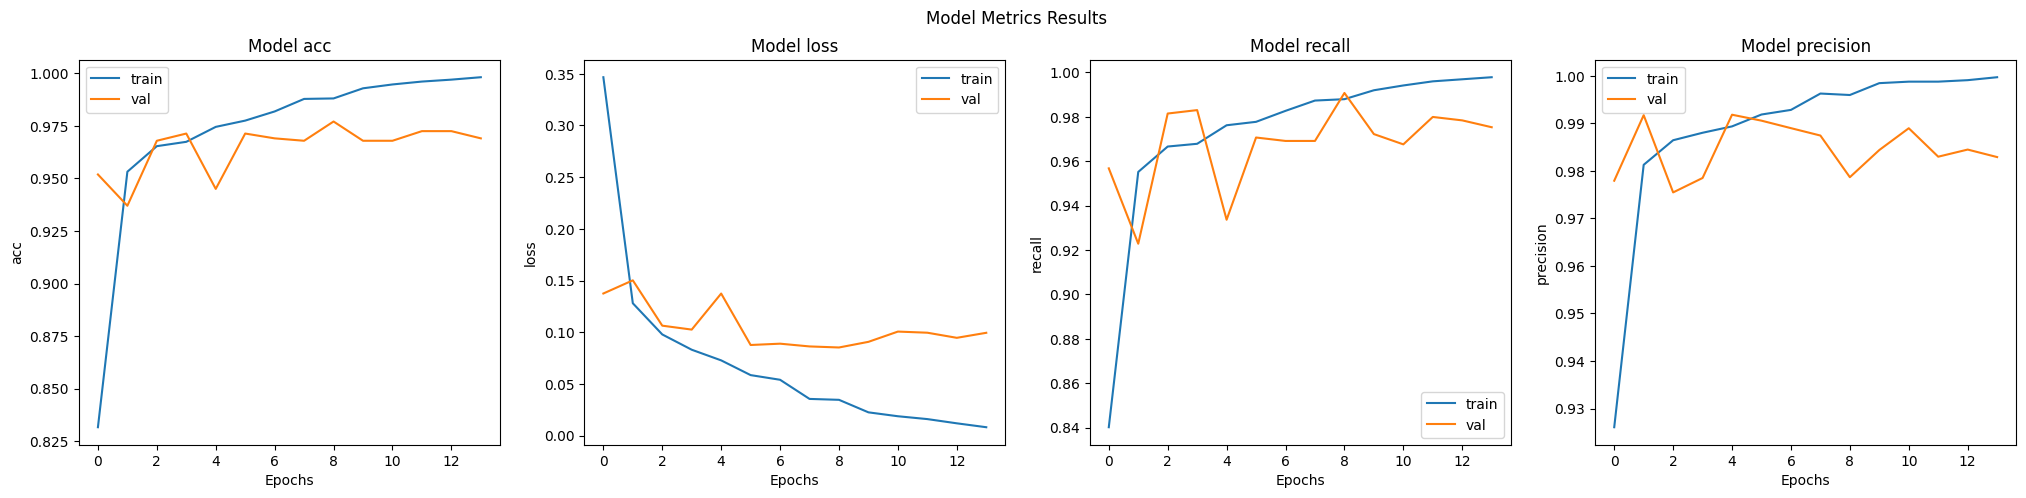

In [86]:
print("Basline Evaluation Metrics w/ Class Weights :\n")
eval_metrics(history4)

In [87]:
train_labels, train_predictions = predict_results(model_4,train_gen)
val_labels, val_predictions = predict_results(model_4,val_gen)

2/2 [==============================] - 0s 55ms/step


2023-03-26 17:53:20.050392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 19ms/step


Training Confusion Matrices:



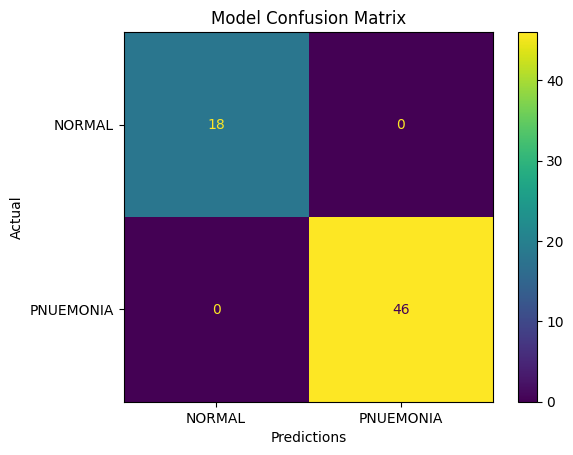

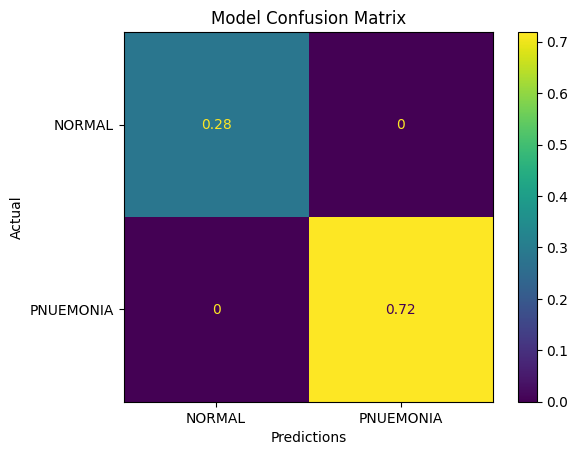

Validation Confusion Matrices:



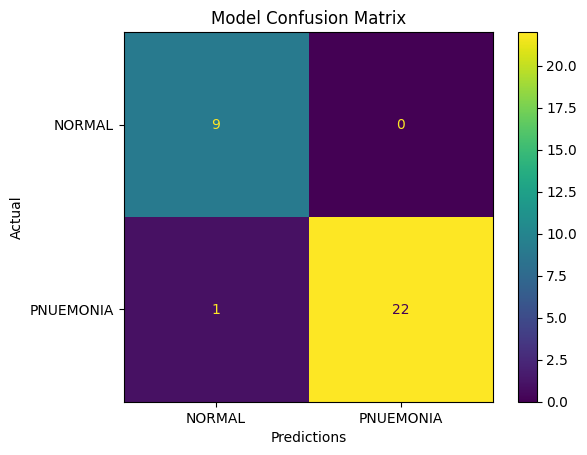

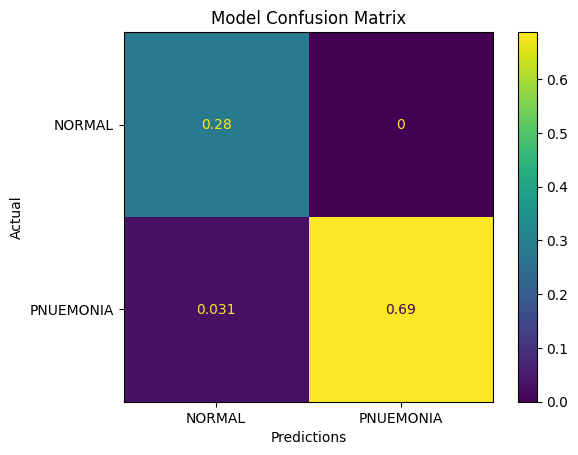

In [88]:
#Printing regular and normalized Confusion Matrices
print("Training Confusion Matrices:\n")
conf_matrix(train_labels,train_predictions, None)
conf_matrix(train_labels,train_predictions, "all")
print("Validation Confusion Matrices:\n")
conf_matrix(val_labels, val_predictions, None)
conf_matrix(val_labels, val_predictions, "all")

In [89]:
#Training Classification Report
print("Training Classificaiton Report:\n")
eval_report(train_labels,train_predictions,train_gen,history4)

Training Classificaiton Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        46

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



69/69 [==============================] - 21s 307ms/step - loss: 0.0062 - acc: 0.9984 - recall: 0.9981 - precision: 0.9997
Loss: 0.006242978852242231


In [90]:
#Training Classification Report
print("Validation Classificaiton Report:\n")
eval_report(val_labels,val_predictions,val_gen,history4)

Validation Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95         9
         1.0       1.00      0.96      0.98        23

    accuracy                           0.97        32
   macro avg       0.95      0.98      0.96        32
weighted avg       0.97      0.97      0.97        32



28/28 [==============================] - 4s 150ms/step - loss: 0.0994 - acc: 0.9691 - recall: 0.9753 - precision: 0.9829
Loss: 0.0994112491607666


Accuracy and Loss metrics are improving. The visuals looks further apart but y-axis values are smaller. The small sample size for normal is limiting.

# Model 5 - Dropout, optimizer

Will add more layers for more complexity

In [92]:
def buildModel(dropout_rate, optimizer = "adam"):

    model= models.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
           padding = 'same', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2), 

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),

    Dense(units=128, activation='relu',), 
    Dropout(dropout_rate),
    Dense(units=64, activation='relu'),
    Dropout(dropout_rate),    
    Dense(units=1, activation='sigmoid'),
    ])

    model.compile(loss='binary_crossentropy',
                    optimizer= optimizer,
                    metrics=["acc","Recall","Precision"]
                     )
    return model

In [93]:
#batch_size = [32,64,96,128,]
epochs = [45,65]
optimizer = ['adam', "SGD"]
dropout_rate = [.3,.5] 
parameters_2 = dict(optimizer=optimizer, dropout_rate=dropout_rate,  epochs=epochs )
parameters_2

{'optimizer': ['adam', 'SGD'], 'dropout_rate': [0.3, 0.5], 'epochs': [45, 65]}

In [94]:
classifier = KerasClassifier(build_fn=buildModel, batch_size = 64, class_weight = class_weights)
#What hyperparameter we want to play with

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters_2,
                           refit = "Acc",
                           scoring = "accuracy",
                           cv = 3,return_train_score=True)
gs_2 = grid_search.fit(X_train, y_train, verbose = 1)

Epoch 1/45


2023-03-26 17:57:34.891079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.7227 - acc: 0.5714 - recall: 0.7308 - precision: 0.6333
Epoch 2/45
1/1 [==============================] - 0s 130ms/step - loss: 0.7113 - acc: 0.4286 - recall: 0.1154 - precision: 0.7500
Epoch 3/45
1/1 [==============================] - 0s 168ms/step - loss: 0.6890 - acc: 0.4524 - recall: 0.1154 - precision: 1.0000
Epoch 4/45
1/1 [==============================] - 0s 115ms/step - loss: 0.7154 - acc: 0.4762 - recall: 0.1538 - precision: 1.0000
Epoch 5/45
1/1 [==============================] - 0s 102ms/step - loss: 0.6630 - acc: 0.6190 - recall: 0.5385 - precision: 0.7778
Epoch 6/45
1/1 [==============================] - 0s 51ms/step - loss: 0.6811 - acc: 0.6905 - recall: 0.7692 - precision: 0.7407
Epoch 7/45
1/1 [==============================] - 0s 168ms/step - loss: 0.7307 - acc: 0.5714 - recall: 0.5000 - precision: 0.7222
Epoch 8/45
1/1 [==============================] - 0s 159ms/step - loss: 0.7334 - acc: 0.5476 - recall: 0.

2023-03-26 17:57:39.889084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 223ms/step
Epoch 1/45


2023-03-26 17:57:41.011921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6638 - acc: 0.6744 - recall: 0.6774 - precision: 0.8400
Epoch 2/45
1/1 [==============================] - 0s 120ms/step - loss: 0.6665 - acc: 0.7674 - recall: 1.0000 - precision: 0.7561
Epoch 3/45
1/1 [==============================] - 0s 142ms/step - loss: 0.6631 - acc: 0.6279 - recall: 0.8387 - precision: 0.7027
Epoch 4/45
1/1 [==============================] - 0s 112ms/step - loss: 0.6840 - acc: 0.6977 - recall: 0.9677 - precision: 0.7143
Epoch 5/45
1/1 [==============================] - 0s 119ms/step - loss: 0.6623 - acc: 0.6279 - recall: 0.8387 - precision: 0.7027
Epoch 6/45
1/1 [==============================] - 0s 98ms/step - loss: 0.6555 - acc: 0.6977 - recall: 0.9355 - precision: 0.7250
Epoch 7/45
1/1 [==============================] - 0s 121ms/step - loss: 0.6616 - acc: 0.7209 - recall: 0.9677 - precision: 0.7317
Epoch 8/45
1/1 [==============================] - 0s 122ms/step - loss: 0.6364 - acc: 0.7442 - recall: 0.

2023-03-26 17:57:45.793527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 189ms/step
Epoch 1/45


2023-03-26 17:57:46.967505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6926 - acc: 0.6047 - recall: 0.6897 - precision: 0.7143
Epoch 2/45
1/1 [==============================] - 0s 177ms/step - loss: 0.6964 - acc: 0.3721 - recall: 0.1034 - precision: 0.7500
Epoch 3/45
1/1 [==============================] - 0s 68ms/step - loss: 0.6867 - acc: 0.3023 - recall: 0.0345 - precision: 0.3333
Epoch 4/45
1/1 [==============================] - 0s 169ms/step - loss: 0.6941 - acc: 0.3488 - recall: 0.1034 - precision: 0.6000
Epoch 5/45
1/1 [==============================] - 0s 107ms/step - loss: 0.6782 - acc: 0.4884 - recall: 0.2759 - precision: 0.8889
Epoch 6/45
1/1 [==============================] - 0s 162ms/step - loss: 0.6763 - acc: 0.4884 - recall: 0.2759 - precision: 0.8889
Epoch 7/45
1/1 [==============================] - 0s 49ms/step - loss: 0.6385 - acc: 0.5581 - recall: 0.4138 - precision: 0.8571
Epoch 8/45
1/1 [==============================] - 0s 94ms/step - loss: 0.6269 - acc: 0.6047 - recall: 0.48

2023-03-26 17:57:51.389625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 119ms/step
Epoch 1/45


2023-03-26 17:57:52.219515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.7168 - acc: 0.7143 - recall: 0.7692 - precision: 0.7692
Epoch 2/45
1/1 [==============================] - 0s 121ms/step - loss: 0.7220 - acc: 0.3571 - recall: 0.3846 - precision: 0.4762
Epoch 3/45
1/1 [==============================] - 0s 157ms/step - loss: 0.7211 - acc: 0.5714 - recall: 0.4615 - precision: 0.7500
Epoch 4/45
1/1 [==============================] - 0s 97ms/step - loss: 0.7179 - acc: 0.5476 - recall: 0.4231 - precision: 0.7333
Epoch 5/45
1/1 [==============================] - 0s 160ms/step - loss: 0.7206 - acc: 0.4524 - recall: 0.3077 - precision: 0.6154
Epoch 6/45
1/1 [==============================] - 0s 62ms/step - loss: 0.7213 - acc: 0.4286 - recall: 0.2308 - precision: 0.6000
Epoch 7/45
1/1 [==============================] - 0s 145ms/step - loss: 0.7185 - acc: 0.4286 - recall: 0.2308 - precision: 0.6000
Epoch 8/45
1/1 [==============================] - 0s 114ms/step - loss: 0.7169 - acc: 0.4048 - recall: 0.1

2023-03-26 17:57:56.639498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 112ms/step
Epoch 1/45


2023-03-26 17:57:57.426312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6687 - acc: 0.3953 - recall: 0.4194 - precision: 0.6190
Epoch 2/45
1/1 [==============================] - 0s 137ms/step - loss: 0.6633 - acc: 0.6512 - recall: 0.7419 - precision: 0.7667
Epoch 3/45
1/1 [==============================] - 0s 161ms/step - loss: 0.6641 - acc: 0.6047 - recall: 0.7097 - precision: 0.7333
Epoch 4/45
1/1 [==============================] - 0s 112ms/step - loss: 0.6626 - acc: 0.6512 - recall: 0.8065 - precision: 0.7353
Epoch 5/45
1/1 [==============================] - 0s 115ms/step - loss: 0.6641 - acc: 0.6977 - recall: 0.8710 - precision: 0.7500
Epoch 6/45
1/1 [==============================] - 0s 139ms/step - loss: 0.6674 - acc: 0.6512 - recall: 0.8710 - precision: 0.7105
Epoch 7/45
1/1 [==============================] - 0s 111ms/step - loss: 0.6637 - acc: 0.7209 - recall: 0.9032 - precision: 0.7568
Epoch 8/45
1/1 [==============================] - 0s 144ms/step - loss: 0.6636 - acc: 0.7907 - recall: 0

2023-03-26 17:58:01.744803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 111ms/step
Epoch 1/45


2023-03-26 17:58:02.542427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6911 - acc: 0.5116 - recall: 0.6207 - precision: 0.6429
Epoch 2/45
1/1 [==============================] - 0s 162ms/step - loss: 0.6891 - acc: 0.5116 - recall: 0.4828 - precision: 0.7000
Epoch 3/45
1/1 [==============================] - 0s 98ms/step - loss: 0.6880 - acc: 0.5116 - recall: 0.4483 - precision: 0.7222
Epoch 4/45
1/1 [==============================] - 0s 97ms/step - loss: 0.6941 - acc: 0.4419 - recall: 0.4138 - precision: 0.6316
Epoch 5/45
1/1 [==============================] - 0s 157ms/step - loss: 0.6861 - acc: 0.6512 - recall: 0.5517 - precision: 0.8889
Epoch 6/45
1/1 [==============================] - 0s 64ms/step - loss: 0.6893 - acc: 0.5581 - recall: 0.5862 - precision: 0.7083
Epoch 7/45
1/1 [==============================] - 0s 47ms/step - loss: 0.6903 - acc: 0.5116 - recall: 0.5172 - precision: 0.6818
Epoch 8/45
1/1 [==============================] - 0s 139ms/step - loss: 0.6932 - acc: 0.4884 - recall: 0.517

2023-03-26 17:58:06.868093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 120ms/step
Epoch 1/65


2023-03-26 17:58:08.020114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.7213 - acc: 0.5476 - recall: 0.6538 - precision: 0.6296
Epoch 2/65
1/1 [==============================] - 0s 170ms/step - loss: 0.7215 - acc: 0.3810 - recall: 0.0385 - precision: 0.5000
Epoch 3/65
1/1 [==============================] - 0s 161ms/step - loss: 0.7154 - acc: 0.4048 - recall: 0.0385 - precision: 1.0000
Epoch 4/65
1/1 [==============================] - 0s 105ms/step - loss: 0.7032 - acc: 0.4048 - recall: 0.0385 - precision: 1.0000
Epoch 5/65
1/1 [==============================] - 0s 166ms/step - loss: 0.6956 - acc: 0.4286 - recall: 0.0769 - precision: 1.0000
Epoch 6/65
1/1 [==============================] - 0s 115ms/step - loss: 0.6566 - acc: 0.4524 - recall: 0.1154 - precision: 1.0000
Epoch 7/65
1/1 [==============================] - 0s 65ms/step - loss: 0.6370 - acc: 0.5000 - recall: 0.1923 - precision: 1.0000
Epoch 8/65
1/1 [==============================] - 0s 120ms/step - loss: 0.6457 - acc: 0.5714 - recall: 0.

1/1 [==============================] - 0s 46ms/step - loss: 8.9769e-05 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 64/65
1/1 [==============================] - 0s 47ms/step - loss: 0.0027 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 197ms/step


2023-03-26 17:58:13.441727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 146ms/step
Epoch 1/65


2023-03-26 17:58:14.301649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6672 - acc: 0.5581 - recall: 0.6452 - precision: 0.7143
Epoch 2/65
1/1 [==============================] - 0s 164ms/step - loss: 0.6624 - acc: 0.6744 - recall: 0.9355 - precision: 0.7073
Epoch 3/65
1/1 [==============================] - 0s 116ms/step - loss: 0.6746 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 4/65
1/1 [==============================] - 0s 143ms/step - loss: 0.6480 - acc: 0.7674 - recall: 1.0000 - precision: 0.7561
Epoch 5/65
1/1 [==============================] - 0s 113ms/step - loss: 0.6474 - acc: 0.7209 - recall: 0.9355 - precision: 0.7436
Epoch 6/65
1/1 [==============================] - 0s 141ms/step - loss: 0.6455 - acc: 0.7209 - recall: 0.9032 - precision: 0.7568
Epoch 7/65
1/1 [==============================] - 0s 117ms/step - loss: 0.6649 - acc: 0.6744 - recall: 0.8065 - precision: 0.7576
Epoch 8/65
1/1 [==============================] - 0s 299ms/step - loss: 0.6570 - acc: 0.6279 - recall: 0

1/1 [==============================] - 0s 47ms/step - loss: 0.0048 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 193ms/step


2023-03-26 17:58:19.870803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 141ms/step
Epoch 1/65


2023-03-26 17:58:20.713583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6903 - acc: 0.6279 - recall: 0.6552 - precision: 0.7600
Epoch 2/65
1/1 [==============================] - 0s 125ms/step - loss: 0.6915 - acc: 0.6512 - recall: 0.8276 - precision: 0.7059
Epoch 3/65
1/1 [==============================] - 0s 160ms/step - loss: 0.6803 - acc: 0.6279 - recall: 0.7241 - precision: 0.7241
Epoch 4/65
1/1 [==============================] - 0s 143ms/step - loss: 0.7077 - acc: 0.6977 - recall: 0.9310 - precision: 0.7105
Epoch 5/65
1/1 [==============================] - 0s 99ms/step - loss: 0.6873 - acc: 0.5349 - recall: 0.6207 - precision: 0.6667
Epoch 6/65
1/1 [==============================] - 0s 150ms/step - loss: 0.6932 - acc: 0.4186 - recall: 0.2414 - precision: 0.7000
Epoch 7/65
1/1 [==============================] - 0s 160ms/step - loss: 0.6541 - acc: 0.4186 - recall: 0.1724 - precision: 0.8333
Epoch 8/65
1/1 [==============================] - 0s 55ms/step - loss: 0.6549 - acc: 0.3953 - recall: 0.1

1/1 [==============================] - 0s 47ms/step - loss: 0.0291 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 64/65
1/1 [==============================] - 0s 47ms/step - loss: 0.0188 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 205ms/step


2023-03-26 17:58:26.087255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 118ms/step
Epoch 1/65


2023-03-26 17:58:27.326742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.7185 - acc: 0.5952 - recall: 0.6538 - precision: 0.6800
Epoch 2/65
1/1 [==============================] - 0s 126ms/step - loss: 0.7225 - acc: 0.4762 - recall: 0.5000 - precision: 0.5909
Epoch 3/65
1/1 [==============================] - 0s 160ms/step - loss: 0.7232 - acc: 0.4286 - recall: 0.3462 - precision: 0.5625
Epoch 4/65
1/1 [==============================] - 0s 155ms/step - loss: 0.7201 - acc: 0.5476 - recall: 0.4231 - precision: 0.7333
Epoch 5/65
1/1 [==============================] - 0s 112ms/step - loss: 0.7196 - acc: 0.4524 - recall: 0.2692 - precision: 0.6364
Epoch 6/65
1/1 [==============================] - 0s 154ms/step - loss: 0.7197 - acc: 0.4524 - recall: 0.2692 - precision: 0.6364
Epoch 7/65
1/1 [==============================] - 0s 50ms/step - loss: 0.7185 - acc: 0.4762 - recall: 0.2692 - precision: 0.7000
Epoch 8/65
1/1 [==============================] - 0s 116ms/step - loss: 0.7186 - acc: 0.4524 - recall: 0.

1/1 [==============================] - 0s 45ms/step - loss: 0.7073 - acc: 0.4048 - recall: 0.0385 - precision: 1.0000
Epoch 64/65
1/1 [==============================] - 0s 46ms/step - loss: 0.7105 - acc: 0.4048 - recall: 0.0385 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 193ms/step


2023-03-26 17:58:32.609008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 108ms/step
Epoch 1/65


2023-03-26 17:58:33.422175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6666 - acc: 0.4651 - recall: 0.5161 - precision: 0.6667
Epoch 2/65
1/1 [==============================] - 0s 119ms/step - loss: 0.6627 - acc: 0.6047 - recall: 0.6129 - precision: 0.7917
Epoch 3/65
1/1 [==============================] - 0s 106ms/step - loss: 0.6646 - acc: 0.6047 - recall: 0.7097 - precision: 0.7333
Epoch 4/65
1/1 [==============================] - 0s 154ms/step - loss: 0.6692 - acc: 0.5581 - recall: 0.7097 - precision: 0.6875
Epoch 5/65
1/1 [==============================] - 0s 143ms/step - loss: 0.6659 - acc: 0.6977 - recall: 0.8387 - precision: 0.7647
Epoch 6/65
1/1 [==============================] - 0s 163ms/step - loss: 0.6656 - acc: 0.6977 - recall: 0.8710 - precision: 0.7500
Epoch 7/65
1/1 [==============================] - 0s 157ms/step - loss: 0.6663 - acc: 0.6744 - recall: 0.9032 - precision: 0.7179
Epoch 8/65
1/1 [==============================] - 0s 116ms/step - loss: 0.6631 - acc: 0.7442 - recall: 0

1/1 [==============================] - 0s 46ms/step - loss: 0.6502 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 65/65
1/1 [==============================] - 0s 199ms/step


2023-03-26 17:58:38.837012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 143ms/step
Epoch 1/65


2023-03-26 17:58:39.661718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6880 - acc: 0.6279 - recall: 0.6552 - precision: 0.7600
Epoch 2/65
1/1 [==============================] - 0s 165ms/step - loss: 0.6906 - acc: 0.4884 - recall: 0.5172 - precision: 0.6522
Epoch 3/65
1/1 [==============================] - 0s 154ms/step - loss: 0.6899 - acc: 0.4651 - recall: 0.4483 - precision: 0.6500
Epoch 4/65
1/1 [==============================] - 0s 145ms/step - loss: 0.6896 - acc: 0.5349 - recall: 0.4828 - precision: 0.7368
Epoch 5/65
1/1 [==============================] - 0s 151ms/step - loss: 0.6920 - acc: 0.3488 - recall: 0.3448 - precision: 0.5263
Epoch 6/65
1/1 [==============================] - 0s 119ms/step - loss: 0.6906 - acc: 0.4884 - recall: 0.4828 - precision: 0.6667
Epoch 7/65
1/1 [==============================] - 0s 138ms/step - loss: 0.6876 - acc: 0.5814 - recall: 0.5517 - precision: 0.7619
Epoch 8/65
1/1 [==============================] - 0s 138ms/step - loss: 0.6923 - acc: 0.5814 - recall: 0

1/1 [==============================] - 0s 46ms/step - loss: 0.6845 - acc: 0.7209 - recall: 0.7241 - precision: 0.8400
Epoch 65/65
1/1 [==============================] - 0s 199ms/step


2023-03-26 17:58:44.894534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 114ms/step
Epoch 1/45


2023-03-26 17:58:45.967909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.7233 - acc: 0.5238 - recall: 0.5769 - precision: 0.6250
Epoch 2/45
1/1 [==============================] - 0s 307ms/step - loss: 0.7346 - acc: 0.4524 - recall: 0.4615 - precision: 0.5714
Epoch 3/45
1/1 [==============================] - 0s 147ms/step - loss: 0.7171 - acc: 0.4524 - recall: 0.3846 - precision: 0.5882
Epoch 4/45
1/1 [==============================] - 0s 118ms/step - loss: 0.7327 - acc: 0.4762 - recall: 0.2692 - precision: 0.7000
Epoch 5/45
1/1 [==============================] - 0s 123ms/step - loss: 0.7169 - acc: 0.4524 - recall: 0.2308 - precision: 0.6667
Epoch 6/45
1/1 [==============================] - 0s 95ms/step - loss: 0.7209 - acc: 0.4524 - recall: 0.1923 - precision: 0.7143
Epoch 7/45
1/1 [==============================] - 0s 96ms/step - loss: 0.7360 - acc: 0.3095 - recall: 0.0769 - precision: 0.2857
Epoch 8/45
1/1 [==============================] - 0s 157ms/step - loss: 0.7246 - acc: 0.3571 - recall: 0.0

2023-03-26 17:58:50.461900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 113ms/step
Epoch 1/45


2023-03-26 17:58:51.293560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6739 - acc: 0.3953 - recall: 0.4839 - precision: 0.6000
Epoch 2/45
1/1 [==============================] - 0s 147ms/step - loss: 0.6695 - acc: 0.5814 - recall: 0.7097 - precision: 0.7097
Epoch 3/45
1/1 [==============================] - 0s 162ms/step - loss: 0.6629 - acc: 0.7209 - recall: 0.9032 - precision: 0.7568
Epoch 4/45
1/1 [==============================] - 0s 155ms/step - loss: 0.6712 - acc: 0.6279 - recall: 0.8710 - precision: 0.6923
Epoch 5/45
1/1 [==============================] - 0s 199ms/step - loss: 0.6796 - acc: 0.6744 - recall: 0.9355 - precision: 0.7073
Epoch 6/45
1/1 [==============================] - 0s 110ms/step - loss: 0.6580 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 7/45
1/1 [==============================] - 0s 155ms/step - loss: 0.6772 - acc: 0.6977 - recall: 0.9677 - precision: 0.7143
Epoch 8/45
1/1 [==============================] - 0s 50ms/step - loss: 0.6569 - acc: 0.7209 - recall: 1.

2023-03-26 17:58:55.736805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 108ms/step
Epoch 1/45


2023-03-26 17:58:56.578607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6923 - acc: 0.5581 - recall: 0.5862 - precision: 0.7083
Epoch 2/45
1/1 [==============================] - 0s 459ms/step - loss: 0.6944 - acc: 0.5349 - recall: 0.5172 - precision: 0.7143
Epoch 3/45
1/1 [==============================] - 0s 95ms/step - loss: 0.6781 - acc: 0.6279 - recall: 0.6207 - precision: 0.7826
Epoch 4/45
1/1 [==============================] - 0s 148ms/step - loss: 0.7234 - acc: 0.4884 - recall: 0.5517 - precision: 0.6400
Epoch 5/45
1/1 [==============================] - 0s 154ms/step - loss: 0.6525 - acc: 0.6512 - recall: 0.6207 - precision: 0.8182
Epoch 6/45
1/1 [==============================] - 0s 147ms/step - loss: 0.7502 - acc: 0.3721 - recall: 0.4138 - precision: 0.5455
Epoch 7/45
1/1 [==============================] - 0s 122ms/step - loss: 0.6759 - acc: 0.5581 - recall: 0.5172 - precision: 0.7500
Epoch 8/45
1/1 [==============================] - 0s 141ms/step - loss: 0.6833 - acc: 0.4419 - recall: 0.

2023-03-26 17:59:01.397293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 107ms/step
Epoch 1/45


2023-03-26 17:59:02.182688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.7220 - acc: 0.4762 - recall: 0.4615 - precision: 0.6000
Epoch 2/45
1/1 [==============================] - 0s 203ms/step - loss: 0.7224 - acc: 0.5000 - recall: 0.5000 - precision: 0.6190
Epoch 3/45
1/1 [==============================] - 0s 114ms/step - loss: 0.7242 - acc: 0.5000 - recall: 0.4615 - precision: 0.6316
Epoch 4/45
1/1 [==============================] - 0s 106ms/step - loss: 0.7176 - acc: 0.5714 - recall: 0.5385 - precision: 0.7000
Epoch 5/45
1/1 [==============================] - 0s 133ms/step - loss: 0.7176 - acc: 0.5952 - recall: 0.5769 - precision: 0.7143
Epoch 6/45
1/1 [==============================] - 0s 225ms/step - loss: 0.7171 - acc: 0.5952 - recall: 0.5385 - precision: 0.7368
Epoch 7/45
1/1 [==============================] - 0s 95ms/step - loss: 0.7183 - acc: 0.5476 - recall: 0.5000 - precision: 0.6842
Epoch 8/45
1/1 [==============================] - 0s 93ms/step - loss: 0.7259 - acc: 0.4048 - recall: 0.3

2023-03-26 17:59:06.430906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 206ms/step
Epoch 1/45


2023-03-26 17:59:07.831958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6618 - acc: 0.6512 - recall: 0.7097 - precision: 0.7857
Epoch 2/45
1/1 [==============================] - 0s 191ms/step - loss: 0.6616 - acc: 0.5581 - recall: 0.5806 - precision: 0.7500
Epoch 3/45
1/1 [==============================] - 0s 180ms/step - loss: 0.6623 - acc: 0.5581 - recall: 0.6129 - precision: 0.7308
Epoch 4/45
1/1 [==============================] - 0s 143ms/step - loss: 0.6733 - acc: 0.4651 - recall: 0.5484 - precision: 0.6538
Epoch 5/45
1/1 [==============================] - 0s 97ms/step - loss: 0.6614 - acc: 0.5581 - recall: 0.6452 - precision: 0.7143
Epoch 6/45
1/1 [==============================] - 0s 134ms/step - loss: 0.6637 - acc: 0.6047 - recall: 0.6774 - precision: 0.7500
Epoch 7/45
1/1 [==============================] - 0s 151ms/step - loss: 0.6564 - acc: 0.6977 - recall: 0.7742 - precision: 0.8000
Epoch 8/45
1/1 [==============================] - 0s 96ms/step - loss: 0.6581 - acc: 0.6977 - recall: 0.8

2023-03-26 17:59:12.345658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 112ms/step
Epoch 1/45


2023-03-26 17:59:13.159313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6951 - acc: 0.4186 - recall: 0.4483 - precision: 0.5909
Epoch 2/45
1/1 [==============================] - 0s 160ms/step - loss: 0.6943 - acc: 0.5116 - recall: 0.5517 - precision: 0.6667
Epoch 3/45
1/1 [==============================] - 0s 165ms/step - loss: 0.6978 - acc: 0.3953 - recall: 0.4483 - precision: 0.5652
Epoch 4/45
1/1 [==============================] - 0s 119ms/step - loss: 0.6883 - acc: 0.5814 - recall: 0.5862 - precision: 0.7391
Epoch 5/45
1/1 [==============================] - 0s 139ms/step - loss: 0.6918 - acc: 0.5116 - recall: 0.5172 - precision: 0.6818
Epoch 6/45
1/1 [==============================] - 0s 172ms/step - loss: 0.6802 - acc: 0.6977 - recall: 0.6552 - precision: 0.8636
Epoch 7/45
1/1 [==============================] - 0s 142ms/step - loss: 0.6860 - acc: 0.5116 - recall: 0.4828 - precision: 0.7000
Epoch 8/45
1/1 [==============================] - 0s 192ms/step - loss: 0.6921 - acc: 0.4884 - recall: 0

2023-03-26 17:59:17.755907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 111ms/step
Epoch 1/65


2023-03-26 17:59:18.556346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.7284 - acc: 0.3810 - recall: 0.3846 - precision: 0.5000
Epoch 2/65
1/1 [==============================] - 0s 203ms/step - loss: 0.7228 - acc: 0.5238 - recall: 0.4231 - precision: 0.6875
Epoch 3/65
1/1 [==============================] - 0s 114ms/step - loss: 0.7221 - acc: 0.4048 - recall: 0.1923 - precision: 0.5556
Epoch 4/65
1/1 [==============================] - 0s 151ms/step - loss: 0.7202 - acc: 0.4048 - recall: 0.1923 - precision: 0.5556
Epoch 5/65
1/1 [==============================] - 0s 156ms/step - loss: 0.6872 - acc: 0.5476 - recall: 0.2692 - precision: 1.0000
Epoch 6/65
1/1 [==============================] - 0s 146ms/step - loss: 0.7367 - acc: 0.3810 - recall: 0.1154 - precision: 0.5000
Epoch 7/65
1/1 [==============================] - 0s 47ms/step - loss: 0.7522 - acc: 0.3333 - recall: 0.0769 - precision: 0.3333
Epoch 8/65
1/1 [==============================] - 0s 106ms/step - loss: 0.6890 - acc: 0.5476 - recall: 0.

1/1 [==============================] - 0s 47ms/step - loss: 0.0216 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 2.4664e-04 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000


2023-03-26 17:59:24.319838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 105ms/step
Epoch 1/65


2023-03-26 17:59:25.488140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6617 - acc: 0.5814 - recall: 0.6452 - precision: 0.7407
Epoch 2/65
1/1 [==============================] - 0s 195ms/step - loss: 0.6507 - acc: 0.6047 - recall: 0.7097 - precision: 0.7333
Epoch 3/65
1/1 [==============================] - 0s 156ms/step - loss: 0.6169 - acc: 0.6977 - recall: 0.7742 - precision: 0.8000
Epoch 4/65
1/1 [==============================] - 0s 111ms/step - loss: 0.7289 - acc: 0.5581 - recall: 0.7097 - precision: 0.6875
Epoch 5/65
1/1 [==============================] - 0s 69ms/step - loss: 0.7390 - acc: 0.5581 - recall: 0.6774 - precision: 0.7000
Epoch 6/65
1/1 [==============================] - 0s 191ms/step - loss: 0.6650 - acc: 0.5581 - recall: 0.5806 - precision: 0.7500
Epoch 7/65
1/1 [==============================] - 0s 66ms/step - loss: 0.6601 - acc: 0.4884 - recall: 0.4516 - precision: 0.7368
Epoch 8/65
1/1 [==============================] - 0s 111ms/step - loss: 0.6543 - acc: 0.5349 - recall: 0.4

1/1 [==============================] - 0s 47ms/step - loss: 0.1200 - acc: 0.9767 - recall: 1.0000 - precision: 0.9688
Epoch 65/65
1/1 [==============================] - 0s 48ms/step - loss: 0.0203 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000


2023-03-26 17:59:31.213850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 106ms/step
Epoch 1/65


2023-03-26 17:59:32.123696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6920 - acc: 0.5349 - recall: 0.6552 - precision: 0.6552
Epoch 2/65
1/1 [==============================] - 0s 201ms/step - loss: 0.6887 - acc: 0.6279 - recall: 0.7241 - precision: 0.7241
Epoch 3/65
1/1 [==============================] - 0s 209ms/step - loss: 0.6946 - acc: 0.4419 - recall: 0.4138 - precision: 0.6316
Epoch 4/65
1/1 [==============================] - 0s 190ms/step - loss: 0.7288 - acc: 0.4651 - recall: 0.4828 - precision: 0.6364
Epoch 5/65
1/1 [==============================] - 0s 113ms/step - loss: 0.6792 - acc: 0.5116 - recall: 0.4828 - precision: 0.7000
Epoch 6/65
1/1 [==============================] - 0s 144ms/step - loss: 0.6886 - acc: 0.5349 - recall: 0.4138 - precision: 0.8000
Epoch 7/65
1/1 [==============================] - 0s 155ms/step - loss: 0.6888 - acc: 0.4884 - recall: 0.3793 - precision: 0.7333
Epoch 8/65
1/1 [==============================] - 0s 65ms/step - loss: 0.6722 - acc: 0.5349 - recall: 0.

1/1 [==============================] - 0s 49ms/step - loss: 0.0143 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 49ms/step - loss: 0.0231 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000


2023-03-26 17:59:37.718662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 124ms/step
Epoch 1/65


2023-03-26 17:59:38.797372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.7255 - acc: 0.4524 - recall: 0.5000 - precision: 0.5652
Epoch 2/65
1/1 [==============================] - 0s 159ms/step - loss: 0.7262 - acc: 0.4048 - recall: 0.4231 - precision: 0.5238
Epoch 3/65
1/1 [==============================] - 0s 173ms/step - loss: 0.7170 - acc: 0.5476 - recall: 0.5000 - precision: 0.6842
Epoch 4/65
1/1 [==============================] - 0s 89ms/step - loss: 0.7214 - acc: 0.4762 - recall: 0.4231 - precision: 0.6111
Epoch 5/65
1/1 [==============================] - 0s 102ms/step - loss: 0.7142 - acc: 0.5714 - recall: 0.5000 - precision: 0.7222
Epoch 6/65
1/1 [==============================] - 0s 110ms/step - loss: 0.7283 - acc: 0.3333 - recall: 0.3077 - precision: 0.4444
Epoch 7/65
1/1 [==============================] - 0s 152ms/step - loss: 0.7293 - acc: 0.3810 - recall: 0.3462 - precision: 0.5000
Epoch 8/65
1/1 [==============================] - 0s 53ms/step - loss: 0.7243 - acc: 0.4048 - recall: 0.3

Epoch 64/65
1/1 [==============================] - 0s 46ms/step - loss: 0.7027 - acc: 0.4048 - recall: 0.0769 - precision: 0.6667
Epoch 65/65
1/1 [==============================] - 0s 183ms/step


2023-03-26 17:59:44.287451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 131ms/step
Epoch 1/65


2023-03-26 17:59:45.391075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6655 - acc: 0.5581 - recall: 0.5484 - precision: 0.7727
Epoch 2/65
1/1 [==============================] - 0s 196ms/step - loss: 0.6670 - acc: 0.6047 - recall: 0.6774 - precision: 0.7500
Epoch 3/65
1/1 [==============================] - 0s 155ms/step - loss: 0.6686 - acc: 0.5814 - recall: 0.6452 - precision: 0.7407
Epoch 4/65
1/1 [==============================] - 0s 71ms/step - loss: 0.6652 - acc: 0.6279 - recall: 0.6774 - precision: 0.7778
Epoch 5/65
1/1 [==============================] - 0s 149ms/step - loss: 0.6707 - acc: 0.5814 - recall: 0.6774 - precision: 0.7241
Epoch 6/65
1/1 [==============================] - 0s 133ms/step - loss: 0.6628 - acc: 0.7209 - recall: 0.8065 - precision: 0.8065
Epoch 7/65
1/1 [==============================] - 0s 108ms/step - loss: 0.6586 - acc: 0.6977 - recall: 0.7419 - precision: 0.8214
Epoch 8/65
1/1 [==============================] - 0s 146ms/step - loss: 0.6609 - acc: 0.6512 - recall: 0.

1/1 [==============================] - 0s 47ms/step - loss: 0.6646 - acc: 0.6977 - recall: 0.9677 - precision: 0.7143
Epoch 65/65
1/1 [==============================] - 0s 178ms/step


2023-03-26 17:59:51.071445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 109ms/step
Epoch 1/65


2023-03-26 17:59:51.860578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6855 - acc: 0.6279 - recall: 0.6552 - precision: 0.7600
Epoch 2/65
1/1 [==============================] - 0s 147ms/step - loss: 0.6898 - acc: 0.5349 - recall: 0.4828 - precision: 0.7368
Epoch 3/65
1/1 [==============================] - 0s 204ms/step - loss: 0.6907 - acc: 0.5116 - recall: 0.5172 - precision: 0.6818
Epoch 4/65
1/1 [==============================] - 0s 199ms/step - loss: 0.6886 - acc: 0.5581 - recall: 0.5172 - precision: 0.7500
Epoch 5/65
1/1 [==============================] - 0s 138ms/step - loss: 0.6893 - acc: 0.6047 - recall: 0.5517 - precision: 0.8000
Epoch 6/65
1/1 [==============================] - 0s 67ms/step - loss: 0.6928 - acc: 0.4651 - recall: 0.4483 - precision: 0.6500
Epoch 7/65
1/1 [==============================] - 0s 66ms/step - loss: 0.6913 - acc: 0.4186 - recall: 0.4138 - precision: 0.6000
Epoch 8/65
1/1 [==============================] - 0s 175ms/step - loss: 0.6941 - acc: 0.4186 - recall: 0.4

1/1 [==============================] - 0s 46ms/step - loss: 0.6909 - acc: 0.4651 - recall: 0.4483 - precision: 0.6500
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 0.6827 - acc: 0.5581 - recall: 0.5172 - precision: 0.7500


2023-03-26 17:59:57.660100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 161ms/step
Epoch 1/65


2023-03-26 17:59:58.869789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.6923 - acc: 0.5781 - recall: 0.6512 - precision: 0.7000
Epoch 2/65
1/1 [==============================] - 0s 154ms/step - loss: 0.6888 - acc: 0.6094 - recall: 0.7209 - precision: 0.7045
Epoch 3/65
1/1 [==============================] - 0s 78ms/step - loss: 0.6965 - acc: 0.6562 - recall: 0.7907 - precision: 0.7234
Epoch 4/65
1/1 [==============================] - 0s 148ms/step - loss: 0.6841 - acc: 0.4531 - recall: 0.3721 - precision: 0.6667
Epoch 5/65
1/1 [==============================] - 0s 179ms/step - loss: 0.7114 - acc: 0.4219 - recall: 0.3023 - precision: 0.6500
Epoch 6/65
1/1 [==============================] - 0s 88ms/step - loss: 0.6790 - acc: 0.4688 - recall: 0.3256 - precision: 0.7368
Epoch 7/65
1/1 [==============================] - 0s 227ms/step - loss: 0.6717 - acc: 0.5781 - recall: 0.4186 - precision: 0.9000
Epoch 8/65
1/1 [==============================] - 0s 165ms/step - loss: 0.6555 - acc: 0.6094 - recall: 0.4

1/1 [==============================] - 0s 62ms/step - loss: 3.0388e-05 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 64/65
1/1 [==============================] - 0s 61ms/step - loss: 2.8443e-05 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 61ms/step - loss: 5.9036e-05 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000


In [95]:
print("Best: %f using %s" % (gs_2.best_score_, gs_2.best_params_))

Best: 0.905483 using {'dropout_rate': 0.3, 'epochs': 65, 'optimizer': 'adam'}


# Model 5 Keep .3 dropout rate, increase the epochs and keep the same optimizer, Using this
vary the learning

In [97]:
model_5= models.Sequential([
Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
           padding = 'same', input_shape=(224,224,3)),
MaxPooling2D(pool_size=(2, 2), strides=2), 

Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),

Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),

Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),

Conv2D(filters=128, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),

Conv2D(filters=128, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
MaxPooling2D(pool_size=(2, 2), strides=2),

Flatten(),

Dense(units=128, activation='relu',), 
Dropout(.3),
Dense(units=64, activation='relu'),
Dropout(.3),    
Dense(units=1, activation='sigmoid'),
    ])

model_5.compile(loss='binary_crossentropy',
                    optimizer= "adam",
                    metrics=["acc","Recall","Precision"]
                     )

In [98]:
model_5.summary()

Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_426 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_428 (MaxPooli  (None, 112, 112, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_427 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_429 (MaxPooli  (None, 56, 56, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_428 (Conv2D)         (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_430 (MaxPooli  (None, 28, 28, 96)    

In [100]:
history5 = model_5.fit(train_gen,
                       epochs=65,
                       verbose = 2,
                       class_weight=class_weights,
                       validation_data=val_gen,
                      callbacks = es) #stopping early because of time resources

Epoch 1/65


2023-03-26 18:04:40.693722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 18:05:02.400339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 - 27s - loss: 0.4500 - acc: 0.7910 - recall: 0.8352 - precision: 0.8773 - val_loss: 0.2822 - val_acc: 0.8763 - val_recall: 0.8611 - val_precision: 0.9688 - 27s/epoch - 390ms/step
Epoch 2/65
69/69 - 24s - loss: 0.2289 - acc: 0.8876 - recall: 0.8736 - precision: 0.9721 - val_loss: 0.1972 - val_acc: 0.9175 - val_recall: 0.8997 - val_precision: 0.9881 - 24s/epoch - 351ms/step
Epoch 3/65
69/69 - 24s - loss: 0.1567 - acc: 0.9307 - recall: 0.9227 - precision: 0.9829 - val_loss: 0.1676 - val_acc: 0.9416 - val_recall: 0.9306 - val_precision: 0.9901 - 24s/epoch - 351ms/step
Epoch 4/65
69/69 - 24s - loss: 0.0985 - acc: 0.9587 - recall: 0.9589 - precision: 0.9851 - val_loss: 0.1147 - val_acc: 0.9645 - val_recall: 0.9583 - val_precision: 0.9936 - 24s/epoch - 349ms/step
Epoch 5/65
69/69 - 24s - loss: 0.0829 - acc: 0.9670 - recall: 0.9672 - precision: 0.9880 - val_loss: 0.1130 - val_acc: 0.9702 - val_recall: 0.9892 - val_precision: 0.9712 - 24s/epoch - 348ms/step
Epoch 6/65
69/69 - 24s - loss: 

Model 5 with updated hyperparamters :



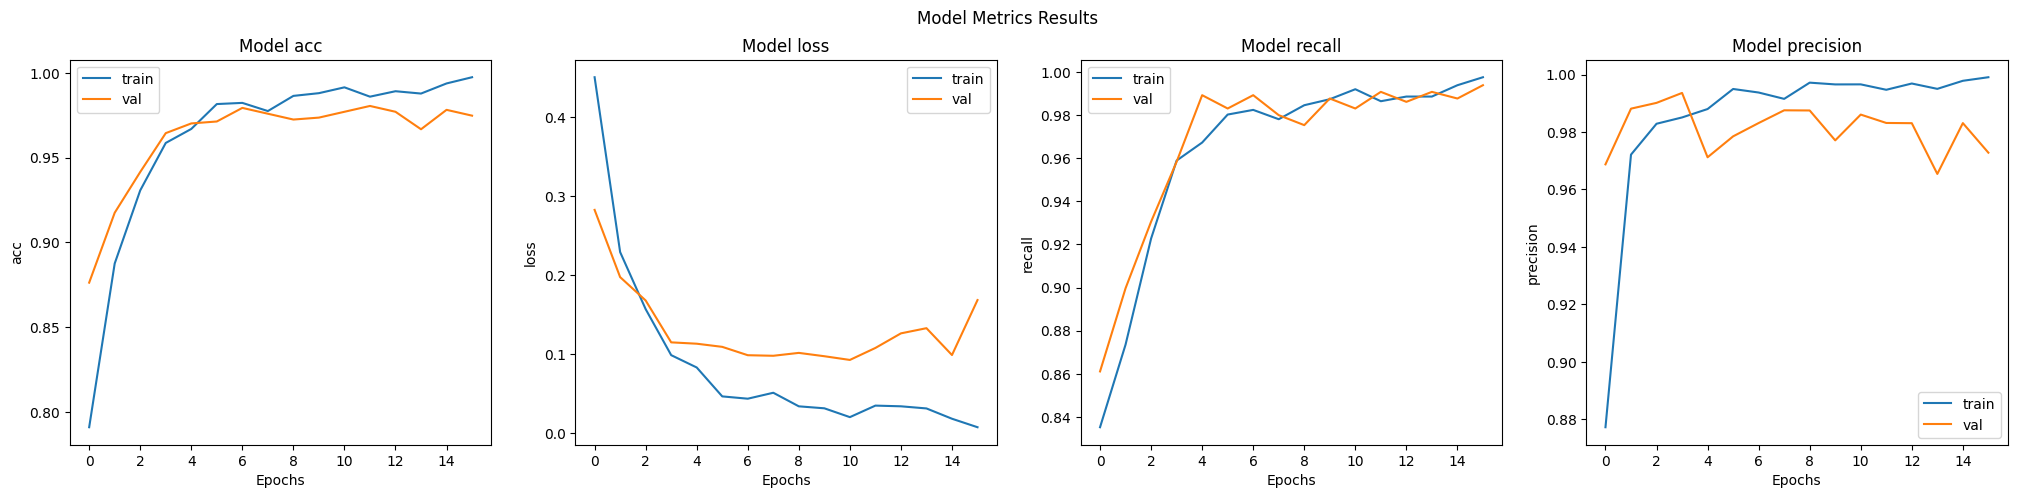

In [101]:
print("Model 5 with updated hyperparamters :\n")
eval_metrics(history5)

In [102]:
train_labels, train_predictions = predict_results(model_5,train_gen)
val_labels, val_predictions = predict_results(model_5,val_gen)

2023-03-26 18:11:46.286073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


Training Confusion Matrices:



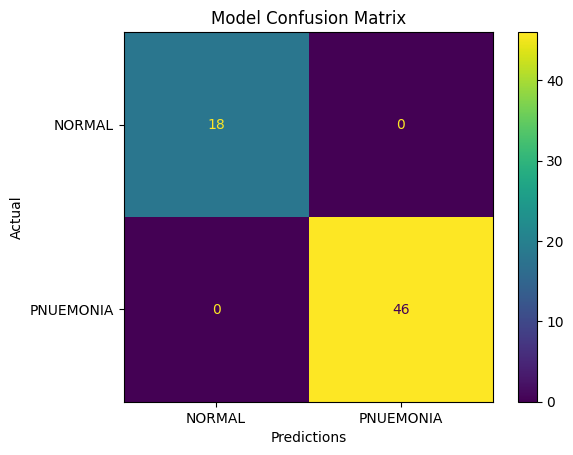

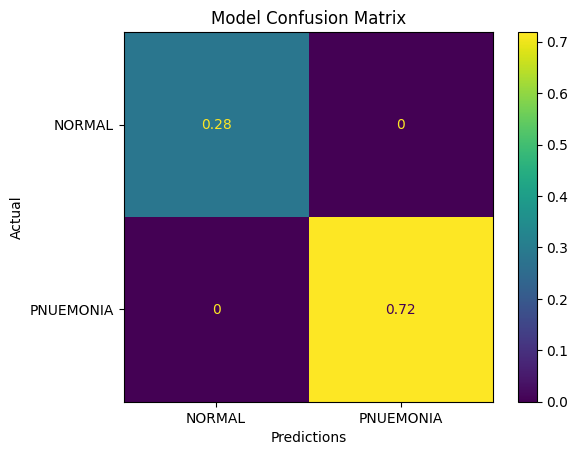

Validation Confusion Matrices:



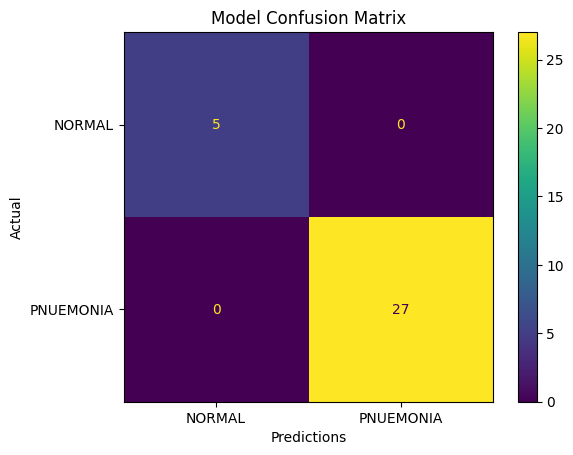

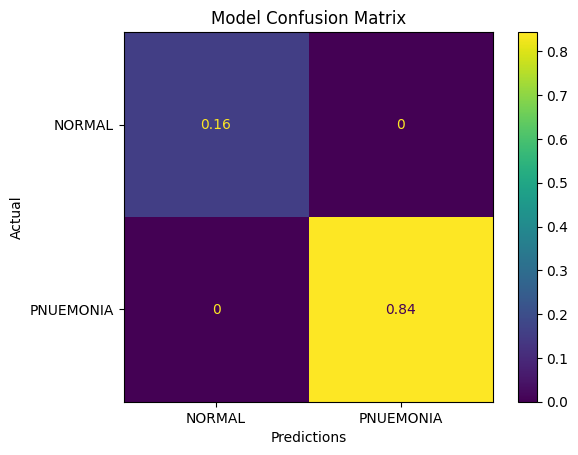

In [103]:
#Printing regular and normalized Confusion Matrices
print("Training Confusion Matrices:\n")
conf_matrix(train_labels,train_predictions, None)
conf_matrix(train_labels,train_predictions, "all")
print("Validation Confusion Matrices:\n")
conf_matrix(val_labels, val_predictions, None)
conf_matrix(val_labels, val_predictions, "all")

In [104]:
#Training Classification Report
print("Training Classificaiton Report:\n")
eval_report(train_labels,train_predictions,train_gen,history5)

Training Classificaiton Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        46

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



69/69 [==============================] - 22s 308ms/step - loss: 0.0086 - acc: 0.9977 - recall: 1.0000 - precision: 0.9969
Loss: 0.008593125268816948


In [105]:
#Training Classification Report
print("Validation Classificaiton Report:\n")
eval_report(val_labels,val_predictions,val_gen,history5)

Validation Classificaiton Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00        27

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



28/28 [==============================] - 4s 148ms/step - loss: 0.1682 - acc: 0.9748 - recall: 0.9938 - precision: 0.9728
Loss: 0.16817939281463623


# Data Augmentation

!(Data Augmentation, YASSINE GHOUZAM, 2017)[https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

Seeing if augmenting the data wi
ll help

In [106]:
datagen = ImageDataGenerator(rescale=1/255,
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = [.1,.2], # Randomly zoom image 
        width_shift_range=[.1,.2],  # randomly shift images horizontally (fraction of total width)
        height_shift_range=[.1,.2],  # randomly shift images vertically (fraction of total height))  
                            )

In [108]:

train_gen_aug = datagen.flow_from_directory(train_directory,
                                                   target_size = (224, 224),
                                                   batch_size=64,
                                                   classes = ["NORMAL","PNEUMONIA"],
                                                   class_mode = 'binary',
                                                   seed = 42)

                                                    

Found 4359 images belonging to 2 classes.


In [109]:
history6 = model_5.fit(train_gen_aug,batch_size=64,
                       epochs=65,
                       verbose = 2,
                       class_weight=class_weights,
                       validation_data=val_gen,
                      callbacks = es) #stopping early because of time resources

Epoch 1/65
69/69 - 42s - loss: 0.6826 - acc: 0.7121 - recall: 0.8986 - precision: 0.7582 - val_loss: 0.8213 - val_acc: 0.2829 - val_recall: 0.0340 - val_precision: 1.0000 - 42s/epoch - 605ms/step
Epoch 2/65
69/69 - 43s - loss: 0.6098 - acc: 0.7050 - recall: 0.8241 - precision: 0.7881 - val_loss: 0.8033 - val_acc: 0.3585 - val_recall: 0.1728 - val_precision: 0.8235 - 43s/epoch - 623ms/step
Epoch 3/65
69/69 - 42s - loss: 0.5761 - acc: 0.7121 - recall: 0.7586 - precision: 0.8381 - val_loss: 0.8031 - val_acc: 0.3116 - val_recall: 0.0772 - val_precision: 0.9434 - 42s/epoch - 616ms/step
Epoch 4/65
69/69 - 42s - loss: 0.5519 - acc: 0.7412 - recall: 0.8000 - precision: 0.8433 - val_loss: 0.6547 - val_acc: 0.5578 - val_recall: 0.4167 - val_precision: 0.9712 - 42s/epoch - 614ms/step
Epoch 5/65
69/69 - 42s - loss: 0.5181 - acc: 0.7483 - recall: 0.7864 - precision: 0.8624 - val_loss: 0.9083 - val_acc: 0.2726 - val_recall: 0.0201 - val_precision: 1.0000 - 42s/epoch - 615ms/step
Epoch 6/65
69/69 - 4

Model 5 with augmented data :



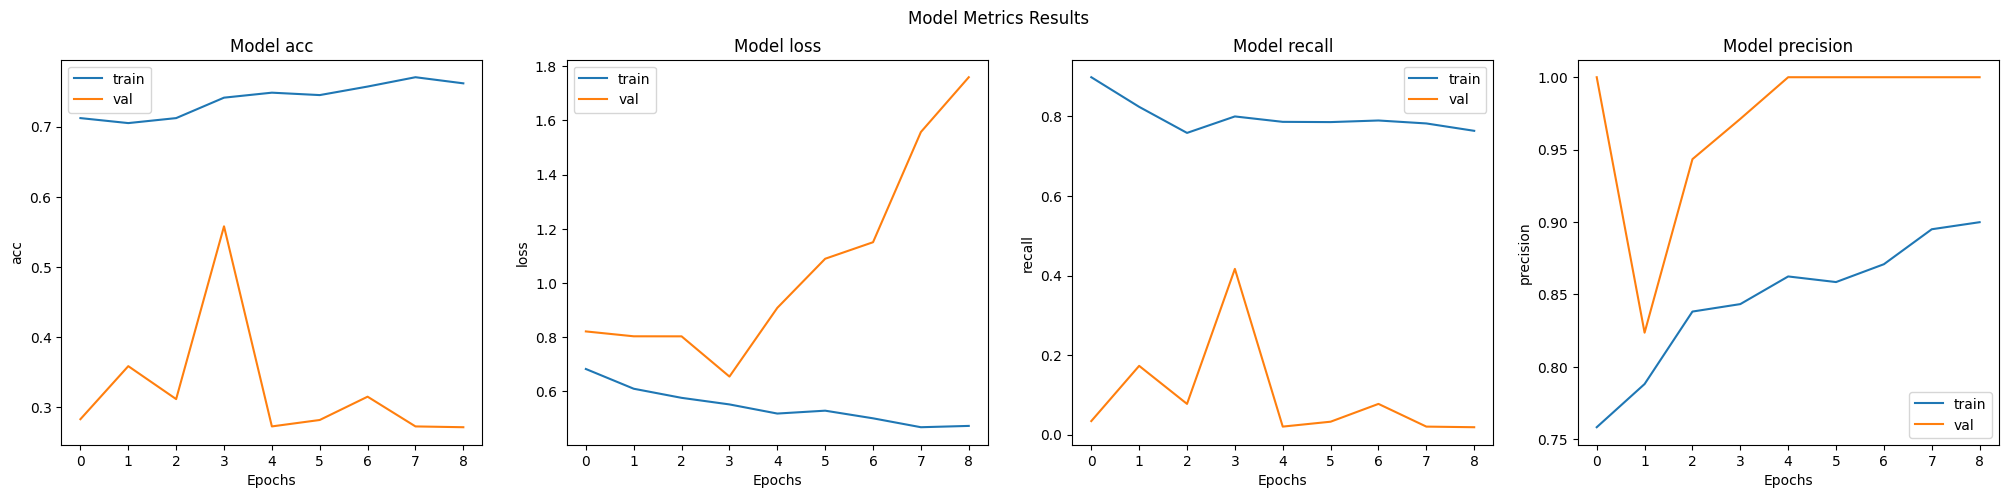

In [110]:
print("Model 6 with augmented data :\n")
eval_metrics(history6)


In [111]:
train_labels, train_predictions = predict_results(model_5,train_gen_aug)
val_labels, val_predictions = predict_results(model_5,val_gen)

1/1 [==============================] - 0s 13ms/step


Training Confusion Matrices:



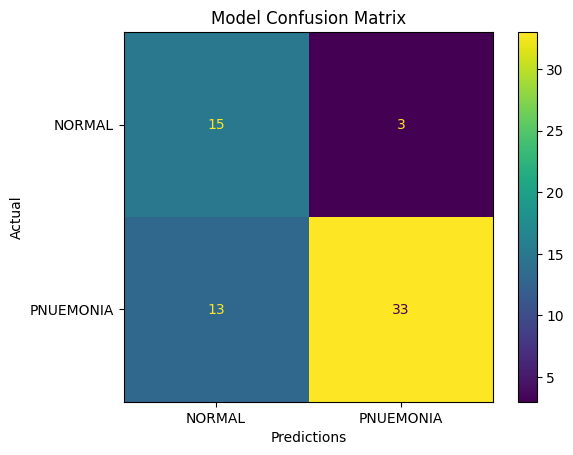

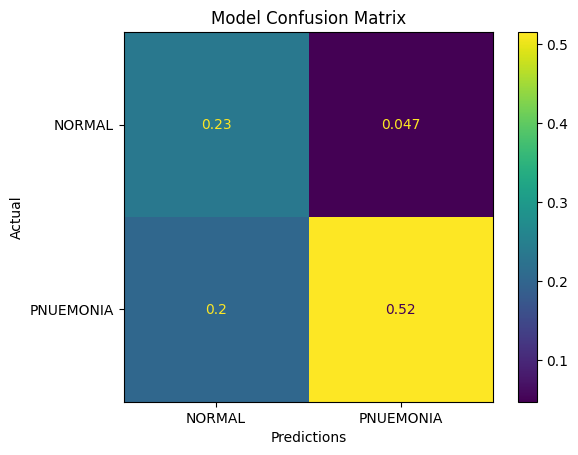

Validation Confusion Matrices:



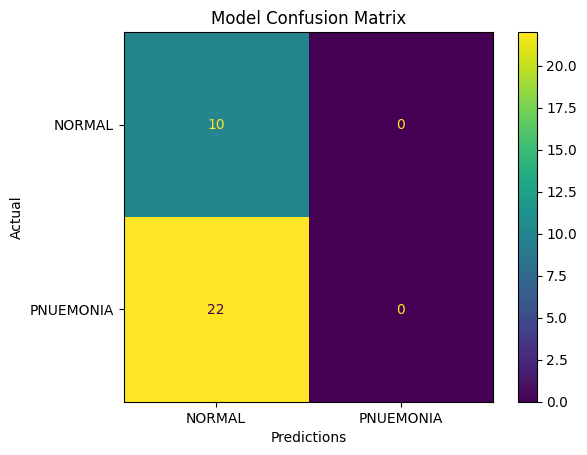

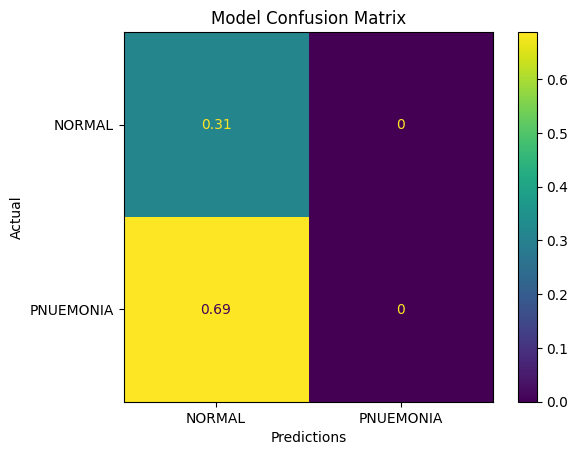

In [112]:
#Printing regular and normalized Confusion Matrices
print("Training Confusion Matrices:\n")
conf_matrix(train_labels,train_predictions, None)
conf_matrix(train_labels,train_predictions, "all")
print("Validation Confusion Matrices:\n")
conf_matrix(val_labels, val_predictions, None)
conf_matrix(val_labels, val_predictions, "all")

In [113]:
#Training Classification Report
print("Training Classificaiton Report:\n")
eval_report(train_labels,train_predictions,train_gen,history6)

Training Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.54      0.83      0.65        18
         1.0       0.92      0.72      0.80        46

    accuracy                           0.75        64
   macro avg       0.73      0.78      0.73        64
weighted avg       0.81      0.75      0.76        64



69/69 [==============================] - 20s 296ms/step - loss: 1.8071 - acc: 0.2700 - recall: 0.0164 - precision: 1.0000
Loss: 1.8071340322494507


In [114]:
#Training Classification Report
print("Validation Classificaiton Report:\n")
eval_report(val_labels,val_predictions,val_gen,history6)

Validation Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.31      1.00      0.48        10
         1.0       0.00      0.00      0.00        22

    accuracy                           0.31        32
   macro avg       0.16      0.50      0.24        32
weighted avg       0.10      0.31      0.15        32



28/28 [==============================] - 4s 139ms/step - loss: 1.7596 - acc: 0.2715 - recall: 0.0185 - precision: 1.0000
Loss: 1.7595864534378052


# Model 7 - Learning Rate Optimization

In [115]:
from keras.optimizers import Adam

In [116]:
def buildModel(learning_rate):

    model= models.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
           padding = 'same', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2), 

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=96, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', 
           padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),

    Dense(units=128, activation='relu',), 
    Dropout(.3),
    Dense(units=64, activation='relu'),
    Dropout(.3),    
    Dense(units=1, activation='sigmoid'),
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer = Adam(learning_rate = learning_rate, ),
                    metrics=["acc","Recall","Precision"])

    
    return model

In [117]:
#batch_size = [32,64,96,128,]

learning_rate = [.001,.01,.1,.2]
#momentum = [.2,.4,.6]
parameters_3 = dict( learning_rate=learning_rate)
parameters_3

{'learning_rate': [0.001, 0.01, 0.1, 0.2]}

In [119]:
classifier = KerasClassifier(build_fn=buildModel, batch_size = 64, epochs = 65, class_weight = class_weights)
#What hyperparameter we want to play with

grid_search = GridSearchCV(estimator = classifier,
                           error_score="raise",
                           param_grid = parameters_3,
                           refit = "Acc",
                           scoring = "accuracy",
                           cv = 3,return_train_score=True)
gs_3 = grid_search.fit(X_train, y_train, verbose = 1)

Epoch 1/65


2023-03-26 18:22:37.222479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.7217 - acc: 0.5952 - recall: 0.6923 - precision: 0.6667
Epoch 2/65
1/1 [==============================] - 0s 194ms/step - loss: 0.7166 - acc: 0.4286 - recall: 0.0769 - precision: 1.0000
Epoch 3/65
1/1 [==============================] - 0s 248ms/step - loss: 0.7284 - acc: 0.3810 - recall: 0.0385 - precision: 0.5000
Epoch 4/65
1/1 [==============================] - 0s 157ms/step - loss: 0.7117 - acc: 0.4524 - recall: 0.1923 - precision: 0.7143
Epoch 5/65
1/1 [==============================] - 0s 240ms/step - loss: 0.7319 - acc: 0.3571 - recall: 0.0385 - precision: 0.3333
Epoch 6/65
1/1 [==============================] - 0s 242ms/step - loss: 0.7046 - acc: 0.3810 - recall: 0.0385 - precision: 0.5000
Epoch 7/65
1/1 [==============================] - 0s 216ms/step - loss: 0.6941 - acc: 0.4048 - recall: 0.0385 - precision: 1.0000
Epoch 8/65
1/1 [==============================] - 0s 78ms/step - loss: 0.7051 - acc: 0.4048 - recall: 0.

1/1 [==============================] - 0s 46ms/step - loss: 0.0043 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 64/65
1/1 [==============================] - 0s 46ms/step - loss: 0.0105 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 46ms/step - loss: 0.0236 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000


2023-03-26 18:22:44.128874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 164ms/step
Epoch 1/65


2023-03-26 18:22:45.171870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6660 - acc: 0.5116 - recall: 0.4516 - precision: 0.7778
Epoch 2/65
1/1 [==============================] - 0s 244ms/step - loss: 0.6667 - acc: 0.7209 - recall: 0.9677 - precision: 0.7317
Epoch 3/65
1/1 [==============================] - 0s 167ms/step - loss: 0.6608 - acc: 0.6744 - recall: 0.8710 - precision: 0.7297
Epoch 4/65
1/1 [==============================] - 0s 239ms/step - loss: 0.6625 - acc: 0.7209 - recall: 0.9677 - precision: 0.7317
Epoch 5/65
1/1 [==============================] - 0s 229ms/step - loss: 0.6636 - acc: 0.6047 - recall: 0.7419 - precision: 0.7188
Epoch 6/65
1/1 [==============================] - 0s 81ms/step - loss: 0.6508 - acc: 0.6047 - recall: 0.7419 - precision: 0.7188
Epoch 7/65
1/1 [==============================] - 0s 125ms/step - loss: 0.6501 - acc: 0.7209 - recall: 0.8065 - precision: 0.8065
Epoch 8/65
1/1 [==============================] - 0s 133ms/step - loss: 0.6202 - acc: 0.6744 - recall: 0.

1/1 [==============================] - 0s 125ms/step - loss: 0.0011 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 48ms/step - loss: 0.0031 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000


2023-03-26 18:22:51.961610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 167ms/step
Epoch 1/65


2023-03-26 18:22:53.021606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.6874 - acc: 0.6512 - recall: 0.7241 - precision: 0.7500
Epoch 2/65
1/1 [==============================] - 0s 255ms/step - loss: 0.6951 - acc: 0.5116 - recall: 0.5172 - precision: 0.6818
Epoch 3/65
1/1 [==============================] - 0s 243ms/step - loss: 0.7093 - acc: 0.4186 - recall: 0.3793 - precision: 0.6111
Epoch 4/65
1/1 [==============================] - 0s 177ms/step - loss: 0.6924 - acc: 0.5581 - recall: 0.6552 - precision: 0.6786
Epoch 5/65
1/1 [==============================] - 0s 56ms/step - loss: 0.6787 - acc: 0.5116 - recall: 0.3448 - precision: 0.8333
Epoch 6/65
1/1 [==============================] - 0s 252ms/step - loss: 0.6627 - acc: 0.4884 - recall: 0.2414 - precision: 1.0000
Epoch 7/65
1/1 [==============================] - 0s 143ms/step - loss: 0.6769 - acc: 0.3721 - recall: 0.1034 - precision: 0.7500
Epoch 8/65
1/1 [==============================] - 0s 241ms/step - loss: 0.6710 - acc: 0.3488 - recall: 0.

1/1 [==============================] - 0s 46ms/step - loss: 5.6003e-05 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 64/65
1/1 [==============================] - 0s 47ms/step - loss: 5.3180e-04 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 6.5686e-04 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000


2023-03-26 18:22:59.715171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 172ms/step
Epoch 1/65


2023-03-26 18:23:00.791780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.7247 - acc: 0.4524 - recall: 0.5769 - precision: 0.5556
Epoch 2/65
1/1 [==============================] - 0s 249ms/step - loss: 25.7166 - acc: 0.4048 - recall: 0.0385 - precision: 1.0000
Epoch 3/65
1/1 [==============================] - 0s 238ms/step - loss: 0.7255 - acc: 0.6190 - recall: 1.0000 - precision: 0.6190
Epoch 4/65
1/1 [==============================] - 0s 161ms/step - loss: 0.7432 - acc: 0.6190 - recall: 1.0000 - precision: 0.6190
Epoch 5/65
1/1 [==============================] - 0s 227ms/step - loss: 0.7272 - acc: 0.6190 - recall: 0.9615 - precision: 0.6250
Epoch 6/65
1/1 [==============================] - 0s 77ms/step - loss: 0.7169 - acc: 0.5238 - recall: 0.4231 - precision: 0.6875
Epoch 7/65
1/1 [==============================] - 0s 85ms/step - loss: 0.7272 - acc: 0.3810 - recall: 0.0769 - precision: 0.5000
Epoch 8/65
1/1 [==============================] - 0s 51ms/step - loss: 0.7091 - acc: 0.4286 - recall: 0.0

1/1 [==============================] - 0s 46ms/step - loss: 0.7191 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 63/65
1/1 [==============================] - 0s 47ms/step - loss: 0.7161 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 64/65
1/1 [==============================] - 0s 46ms/step - loss: 0.7163 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 65/65
1/1 [==============================] - 0s 46ms/step - loss: 0.7161 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00


2023-03-26 18:23:07.599064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 167ms/step
Epoch 1/65


2023-03-26 18:23:09.055154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.6639 - acc: 0.5116 - recall: 0.4839 - precision: 0.7500
Epoch 2/65
1/1 [==============================] - 0s 224ms/step - loss: 40.4001 - acc: 0.6744 - recall: 0.9032 - precision: 0.7179
Epoch 3/65
1/1 [==============================] - 0s 223ms/step - loss: 1.1464 - acc: 0.3023 - recall: 0.0323 - precision: 1.0000
Epoch 4/65
1/1 [==============================] - 0s 163ms/step - loss: 0.7108 - acc: 0.3023 - recall: 0.0323 - precision: 1.0000
Epoch 5/65
1/1 [==============================] - 0s 241ms/step - loss: 0.6627 - acc: 0.7442 - recall: 1.0000 - precision: 0.7381
Epoch 6/65
1/1 [==============================] - 0s 131ms/step - loss: 0.6677 - acc: 0.6977 - recall: 0.9677 - precision: 0.7143
Epoch 7/65
1/1 [==============================] - 0s 139ms/step - loss: 0.6515 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 8/65
1/1 [==============================] - 0s 165ms/step - loss: 0.6764 - acc: 0.7209 - recall: 

1/1 [==============================] - 0s 50ms/step - loss: 0.6631 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 0.6584 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209


2023-03-26 18:23:15.856310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 164ms/step
Epoch 1/65


2023-03-26 18:23:16.856641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.6915 - acc: 0.5116 - recall: 0.4828 - precision: 0.7000
Epoch 2/65
1/1 [==============================] - 0s 244ms/step - loss: 22.5956 - acc: 0.3488 - recall: 0.1034 - precision: 0.6000
Epoch 3/65
1/1 [==============================] - 0s 254ms/step - loss: 0.8585 - acc: 0.6744 - recall: 1.0000 - precision: 0.6744
Epoch 4/65
1/1 [==============================] - 0s 135ms/step - loss: 0.9051 - acc: 0.6744 - recall: 1.0000 - precision: 0.6744
Epoch 5/65
1/1 [==============================] - 0s 85ms/step - loss: 0.6945 - acc: 0.6744 - recall: 1.0000 - precision: 0.6744
Epoch 6/65
1/1 [==============================] - 0s 247ms/step - loss: 0.6915 - acc: 0.3488 - recall: 0.1379 - precision: 0.5714
Epoch 7/65
1/1 [==============================] - 0s 161ms/step - loss: 0.6958 - acc: 0.3256 - recall: 0.0345 - precision: 0.5000
Epoch 8/65
1/1 [==============================] - 0s 140ms/step - loss: 0.6972 - acc: 0.3721 - recall: 0

Epoch 64/65
1/1 [==============================] - 0s 47ms/step - loss: 0.6989 - acc: 0.5349 - recall: 0.6552 - precision: 0.6552
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 0.6913 - acc: 0.5581 - recall: 0.6897 - precision: 0.6667


2023-03-26 18:23:23.776925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 173ms/step
Epoch 1/65


2023-03-26 18:23:24.839127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.7209 - acc: 0.5476 - recall: 0.6154 - precision: 0.6400
Epoch 2/65
1/1 [==============================] - 0s 359ms/step - loss: 211626432.0000 - acc: 0.4048 - recall: 0.0385 - precision: 1.0000
Epoch 3/65
1/1 [==============================] - 0s 173ms/step - loss: 19033.4668 - acc: 0.6190 - recall: 1.0000 - precision: 0.6190
Epoch 4/65
1/1 [==============================] - 0s 83ms/step - loss: 473569.2812 - acc: 0.6190 - recall: 1.0000 - precision: 0.6190
Epoch 5/65
1/1 [==============================] - 0s 219ms/step - loss: 93288.6953 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 6/65
1/1 [==============================] - 0s 224ms/step - loss: 331152.3438 - acc: 0.6190 - recall: 1.0000 - precision: 0.6190
Epoch 7/65
1/1 [==============================] - 0s 167ms/step - loss: 23069342.0000 - acc: 0.6190 - recall: 1.0000 - precision: 0.6190
Epoch 8/65
1/1 [==============================] - 0s 134ms/step 

1/1 [==============================] - 0s 141ms/step - loss: 0.7157 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 61/65
1/1 [==============================] - 0s 47ms/step - loss: 0.7157 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 62/65
1/1 [==============================] - 0s 46ms/step - loss: 0.7157 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 63/65
1/1 [==============================] - 0s 46ms/step - loss: 0.7156 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 64/65
1/1 [==============================] - 0s 46ms/step - loss: 0.7155 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 0.7155 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00


2023-03-26 18:23:31.699600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 160ms/step
Epoch 1/65


2023-03-26 18:23:32.898551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.6645 - acc: 0.6047 - recall: 0.6774 - precision: 0.7500
Epoch 2/65
1/1 [==============================] - 0s 255ms/step - loss: 165076784.0000 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 3/65
1/1 [==============================] - 0s 147ms/step - loss: 80171.3750 - acc: 0.2791 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 4/65
1/1 [==============================] - 0s 218ms/step - loss: 840.9182 - acc: 0.2791 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 5/65
1/1 [==============================] - 0s 164ms/step - loss: 94157.8594 - acc: 0.2791 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 6/65
1/1 [==============================] - 0s 141ms/step - loss: 72.4109 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 7/65
1/1 [==============================] - 0s 219ms/step - loss: 1164.7164 - acc: 0.8140 - recall: 1.0000 - precision: 0.7949
Epoch 8/65
1/1 [==============================] - 0s 79ms/

1/1 [==============================] - 0s 47ms/step - loss: 0.6612 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 64/65
1/1 [==============================] - 0s 48ms/step - loss: 0.6628 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 0.6650 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209


2023-03-26 18:23:39.656054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 167ms/step
Epoch 1/65


2023-03-26 18:23:41.083468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.6976 - acc: 0.3721 - recall: 0.4483 - precision: 0.5417
Epoch 2/65
1/1 [==============================] - 0s 244ms/step - loss: 23444730.0000 - acc: 0.4419 - recall: 0.3103 - precision: 0.6923
Epoch 3/65
1/1 [==============================] - 0s 315ms/step - loss: 87.1178 - acc: 0.6744 - recall: 1.0000 - precision: 0.6744
Epoch 4/65
1/1 [==============================] - 0s 260ms/step - loss: 25.0681 - acc: 0.6744 - recall: 1.0000 - precision: 0.6744
Epoch 5/65
1/1 [==============================] - 0s 162ms/step - loss: 9.6713 - acc: 0.3256 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 6/65
1/1 [==============================] - 0s 240ms/step - loss: 1.1376 - acc: 0.3256 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 7/65
1/1 [==============================] - 0s 218ms/step - loss: 1.2116 - acc: 0.5814 - recall: 0.8621 - precision: 0.6410
Epoch 8/65
1/1 [==============================] - 0s 163ms/step - loss: 0.9758 

1/1 [==============================] - 0s 47ms/step - loss: 0.6935 - acc: 0.3023 - recall: 0.1379 - precision: 0.4444
Epoch 64/65
1/1 [==============================] - 0s 48ms/step - loss: 0.6895 - acc: 0.3953 - recall: 0.1379 - precision: 0.8000
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 0.6922 - acc: 0.3256 - recall: 0.0690 - precision: 0.5000


2023-03-26 18:23:47.988470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 207ms/step
Epoch 1/65


2023-03-26 18:23:49.035114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.7190 - acc: 0.5714 - recall: 0.5769 - precision: 0.6818
Epoch 2/65
1/1 [==============================] - 0s 258ms/step - loss: 42177245184.0000 - acc: 0.3571 - recall: 0.1154 - precision: 0.4286
Epoch 3/65
1/1 [==============================] - 0s 221ms/step - loss: 460031.6250 - acc: 0.6190 - recall: 1.0000 - precision: 0.6190
Epoch 4/65
1/1 [==============================] - 0s 165ms/step - loss: 80.4445 - acc: 0.3571 - recall: 0.0385 - precision: 0.3333
Epoch 5/65
1/1 [==============================] - 0s 245ms/step - loss: 709575.5625 - acc: 0.6190 - recall: 1.0000 - precision: 0.6190
Epoch 6/65
1/1 [==============================] - 0s 52ms/step - loss: 13032.1309 - acc: 0.6190 - recall: 1.0000 - precision: 0.6190
Epoch 7/65
1/1 [==============================] - 0s 246ms/step - loss: 11593.8066 - acc: 0.4048 - recall: 0.3846 - precision: 0.5263
Epoch 8/65
1/1 [==============================] - 0s 241ms/step - loss: 1015

1/1 [==============================] - 0s 45ms/step - loss: 0.7160 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 62/65
1/1 [==============================] - 0s 46ms/step - loss: 0.7154 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 63/65
1/1 [==============================] - 0s 47ms/step - loss: 0.7151 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 64/65
1/1 [==============================] - 0s 47ms/step - loss: 0.7149 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 0.7148 - acc: 0.3810 - recall: 0.0000e+00 - precision: 0.0000e+00


2023-03-26 18:23:55.948361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 164ms/step
Epoch 1/65


2023-03-26 18:23:56.992222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.6686 - acc: 0.4884 - recall: 0.5484 - precision: 0.6800
Epoch 2/65
1/1 [==============================] - 0s 174ms/step - loss: 9478005760.0000 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 3/65
1/1 [==============================] - 0s 252ms/step - loss: 89526784.0000 - acc: 0.2791 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 4/65
1/1 [==============================] - 0s 256ms/step - loss: 263657072.0000 - acc: 0.2791 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 5/65
1/1 [==============================] - 0s 145ms/step - loss: 2256140.2500 - acc: 0.7209 - recall: 1.0000 - precision: 0.7209
Epoch 6/65
1/1 [==============================] - 0s 136ms/step - loss: 46229.0508 - acc: 0.5116 - recall: 0.4839 - precision: 0.7500
Epoch 7/65
1/1 [==============================] - 0s 218ms/step - loss: 916647.2500 - acc: 0.3953 - recall: 0.1613 - precision: 1.0000
Epoch 8/65
1/1 [==============================] -

1/1 [==============================] - 0s 47ms/step - loss: 11326.9932 - acc: 0.5349 - recall: 0.7097 - precision: 0.6667
Epoch 63/65
1/1 [==============================] - 0s 46ms/step - loss: 25938.7695 - acc: 0.6279 - recall: 0.7419 - precision: 0.7419
Epoch 64/65
1/1 [==============================] - 0s 48ms/step - loss: 5714.1152 - acc: 0.7209 - recall: 0.8710 - precision: 0.7714
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 9743.6240 - acc: 0.6744 - recall: 0.8710 - precision: 0.7297


2023-03-26 18:24:03.899645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 164ms/step
Epoch 1/65


2023-03-26 18:24:04.954411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.6935 - acc: 0.4651 - recall: 0.5517 - precision: 0.6154
Epoch 2/65
1/1 [==============================] - 0s 259ms/step - loss: 6965816320.0000 - acc: 0.5116 - recall: 0.5517 - precision: 0.6667
Epoch 3/65
1/1 [==============================] - 0s 246ms/step - loss: 1273165.0000 - acc: 0.3256 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 4/65
1/1 [==============================] - 0s 242ms/step - loss: 12678013.0000 - acc: 0.3488 - recall: 0.1724 - precision: 0.5556
Epoch 5/65
1/1 [==============================] - 0s 163ms/step - loss: 13497430.0000 - acc: 0.6744 - recall: 1.0000 - precision: 0.6744
Epoch 6/65
1/1 [==============================] - 0s 163ms/step - loss: 3098358.7500 - acc: 0.3256 - recall: 0.0345 - precision: 0.5000
Epoch 7/65
1/1 [==============================] - 0s 139ms/step - loss: 2687.3789 - acc: 0.5581 - recall: 0.6552 - precision: 0.6786
Epoch 8/65
1/1 [==============================] - 0s 173ms

1/1 [==============================] - 0s 47ms/step - loss: 5450.6812 - acc: 0.6279 - recall: 0.7931 - precision: 0.6970
Epoch 63/65
1/1 [==============================] - 0s 47ms/step - loss: 1040.7876 - acc: 0.6279 - recall: 0.8276 - precision: 0.6857
Epoch 64/65
1/1 [==============================] - 0s 47ms/step - loss: 717.0396 - acc: 0.5814 - recall: 0.7241 - precision: 0.6774
Epoch 65/65
1/1 [==============================] - 0s 47ms/step - loss: 513.9681 - acc: 0.3721 - recall: 0.3793 - precision: 0.5500


2023-03-26 18:24:11.736090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 211ms/step
Epoch 1/65


2023-03-26 18:24:12.769941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.6936 - acc: 0.5469 - recall: 0.5814 - precision: 0.6944
Epoch 2/65
1/1 [==============================] - 0s 257ms/step - loss: 0.6930 - acc: 0.5781 - recall: 0.7442 - precision: 0.6667
Epoch 3/65
1/1 [==============================] - 0s 115ms/step - loss: 0.6857 - acc: 0.5938 - recall: 0.5581 - precision: 0.7742
Epoch 4/65
1/1 [==============================] - 0s 242ms/step - loss: 0.6828 - acc: 0.4844 - recall: 0.2326 - precision: 1.0000
Epoch 5/65
1/1 [==============================] - 0s 234ms/step - loss: 0.6823 - acc: 0.3906 - recall: 0.2093 - precision: 0.6429
Epoch 6/65
1/1 [==============================] - 0s 232ms/step - loss: 0.6660 - acc: 0.5312 - recall: 0.4419 - precision: 0.7600
Epoch 7/65
1/1 [==============================] - 0s 222ms/step - loss: 0.6991 - acc: 0.5625 - recall: 0.5116 - precision: 0.7586
Epoch 8/65
1/1 [==============================] - 0s 108ms/step - loss: 0.6533 - acc: 0.5938 - recall: 0

1/1 [==============================] - 0s 62ms/step - loss: 0.0337 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 65/65
1/1 [==============================] - 0s 61ms/step - loss: 0.0230 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000


In [120]:
print("Best: %f using %s" % (gs_3.best_score_, gs_3.best_params_))

Best: 0.905483 using {'learning_rate': 0.001}


This is the defult learning rate, nothing changes.

In [158]:
print("--"*55)

--------------------------------------------------------------------------------------------------------------


# Transfer Learning

In [ ]:
## VGG19 Model 

In [129]:
# Transfer Learning V19
from keras.preprocessing import image
from PIL import Image

In [142]:
model_8 = models.Sequential()
model_8.add(cnn_base)
model_8.add(layers.Flatten())
model_8.add(layers.Dense(132, activation='relu'))
model_8.add(layers.Dense(1, activation='sigmoid'))

In [137]:
cnn_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [138]:
model_8.summary()

Model: "sequential_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_131 (Flatten)       (None, 25088)             0         
                                                                 
 dense_307 (Dense)           (None, 132)               3311748   
                                                                 
 dense_308 (Dense)           (None, 1)                 133       
                                                                 
Total params: 23,336,265
Trainable params: 23,336,265
Non-trainable params: 0
_________________________________________________________________


In [131]:
#imagenet = os.path.join(cur_dir,"weight/vgg19_weights_tf_dim_ordering_tf_kernels_notop (1).h5")

In [134]:
cnn_base = VGG19(weights="imagenet", 
                 include_top=False, 
                 input_shape=(224, 224, 3))

In [139]:
# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model8.layers:
    print(layer.name, layer.trainable)
    
# Similarly, you can check how many trainable weights are in the model
print(len(model8.trainable_weights))

vgg19 True
flatten_131 True
dense_307 True
dense_308 True
36


In [140]:
# Freeze the model
cnn_base.trainable = False

In [143]:
# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model_8.layers:
    print(layer.name, layer.trainable)
    
# Similarly, you can check how many trainable weights are in the model
print(len(model8.trainable_weights))

vgg19 False
flatten_132 True
dense_309 True
dense_310 True
4


In [144]:
model_8.compile(loss='binary_crossentropy',
                    optimizer= "adam",
                    metrics=["acc","Recall","Precision"]
                     )

In [145]:
#Fitting with augmented training data
history8 = model_8.fit(train_gen_aug,batch_size=64,
                       epochs=65,
                       verbose = 2,
                       class_weight=class_weights,
                       validation_data=val_gen, 
                      callbacks = es) #stopping early because of time resources

Epoch 1/65


2023-03-26 20:20:11.880771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 20:20:53.324065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 - 48s - loss: 0.7275 - acc: 0.6774 - recall: 0.7657 - precision: 0.7926 - val_loss: 2.1053 - val_acc: 0.2577 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 48s/epoch - 696ms/step
Epoch 2/65
69/69 - 46s - loss: 0.5229 - acc: 0.7646 - recall: 0.8263 - precision: 0.8521 - val_loss: 1.9428 - val_acc: 0.2577 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 46s/epoch - 669ms/step
Epoch 3/65
69/69 - 46s - loss: 0.5131 - acc: 0.7488 - recall: 0.7904 - precision: 0.8598 - val_loss: 1.3269 - val_acc: 0.2577 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 46s/epoch - 672ms/step
Epoch 4/65
69/69 - 47s - loss: 0.5100 - acc: 0.7511 - recall: 0.7972 - precision: 0.8574 - val_loss: 1.2343 - val_acc: 0.2577 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 47s/epoch - 686ms/step
Epoch 5/65
69/69 - 46s - loss: 0.4954 - acc: 0.7518 - recall: 0.7805 - precision: 0.8716 - val_loss: 0.8800 - val_acc: 0.2784 - val_recall: 0.0309 - val_precision: 0.9091 - 46s/epoch - 665ms/step

Model 8 with augmented data :



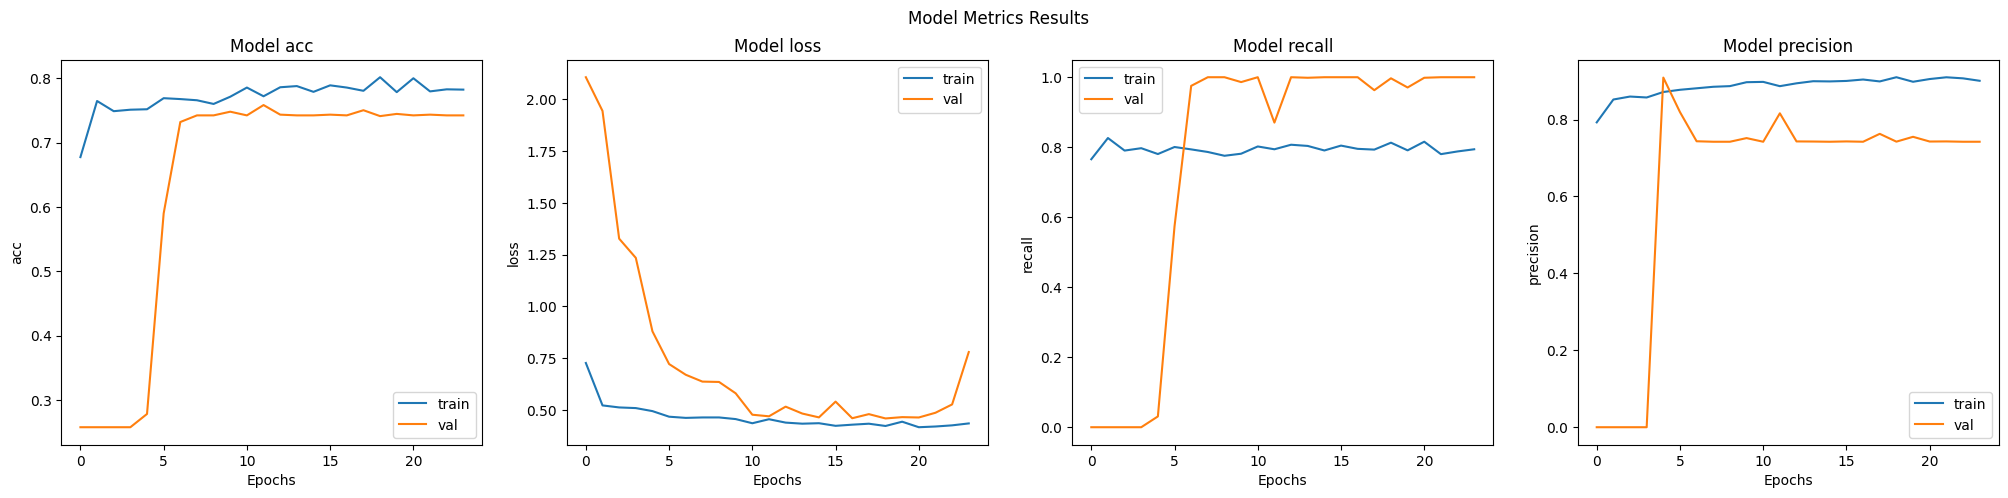

In [148]:
print("Model 8 with augmented data :\n")
eval_metrics(history8)

In [159]:
train_labels, train_predictions = predict_results(model_8,train_gen_aug)
val_labels, val_predictions = predict_results(model_8,val_gen)

2023-03-26 21:16:53.780145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


Training Confusion Matrices:



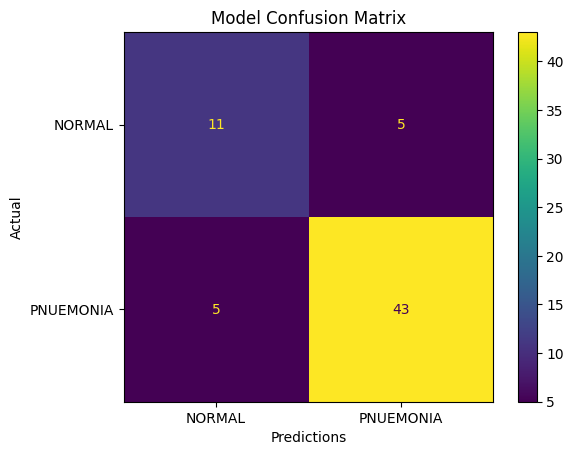

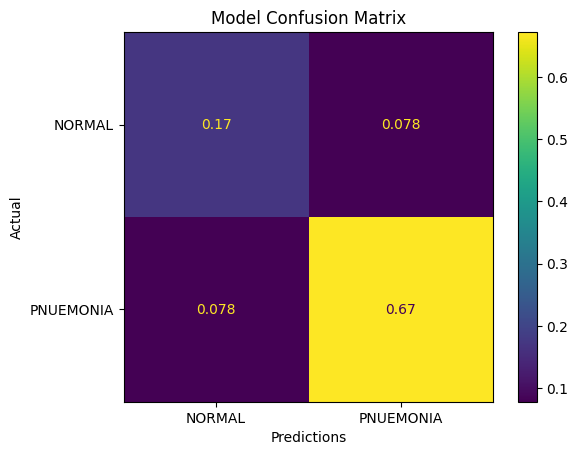

Validation Confusion Matrices:



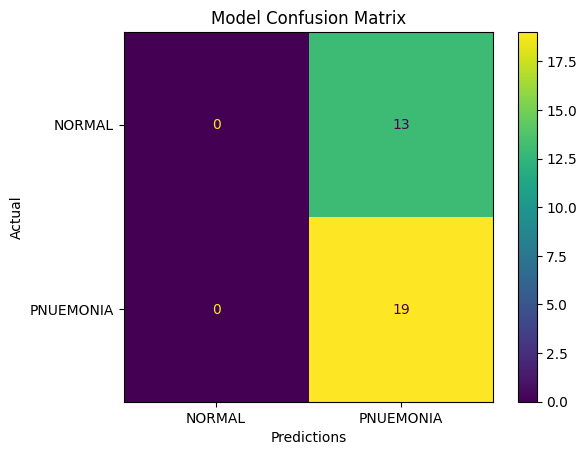

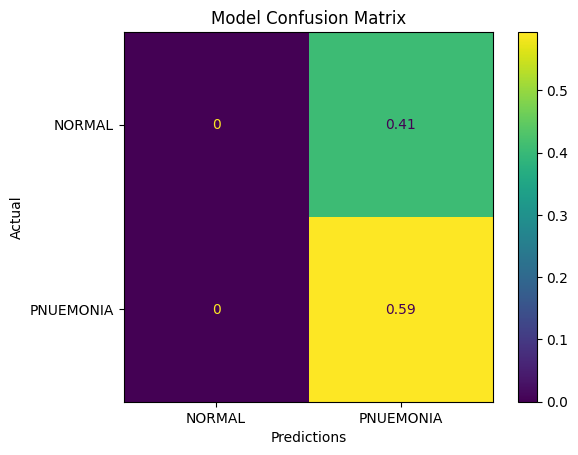

In [160]:
#Printing regular and normalized Confusion Matrices
print("Training Confusion Matrices:\n")
conf_matrix(train_labels,train_predictions, None)
conf_matrix(train_labels,train_predictions, "all")
print("Validation Confusion Matrices:\n")
conf_matrix(val_labels, val_predictions, None)
conf_matrix(val_labels, val_predictions, "all")

In [161]:
#Training Classification Report
print("Training Classificaiton Report:\n")
eval_report(train_labels,train_predictions,train_gen_aug,history8)

Training Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69        16
         1.0       0.90      0.90      0.90        48

    accuracy                           0.84        64
   macro avg       0.79      0.79      0.79        64
weighted avg       0.84      0.84      0.84        64



69/69 [==============================] - 42s 596ms/step - loss: 0.5970 - acc: 0.8162 - recall: 0.8968 - precision: 0.8613
Loss: 0.5969811081886292


In [162]:
#Training Classification Report
print("Validation Classificaiton Report:\n")
eval_report(val_labels,val_predictions,val_gen,history8)

Validation Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       0.59      1.00      0.75        19

    accuracy                           0.59        32
   macro avg       0.30      0.50      0.37        32
weighted avg       0.35      0.59      0.44        32



28/28 [==============================] - 5s 166ms/step - loss: 0.6245 - acc: 0.7423 - recall: 1.0000 - precision: 0.7423
Loss: 0.6244602799415588


### Modeling without Augmented Data

In [146]:
#Fitting with non augmented data
history9 = model_8.fit(train_gen,batch_size=64,
                       epochs=65,
                       verbose = 2,
                       class_weight=class_weights,
                       validation_data=val_gen, 
                      callbacks = es) #stopping early because of time resources

Epoch 1/65
69/69 - 29s - loss: 0.6798 - acc: 0.7054 - recall: 0.9144 - precision: 0.7460 - val_loss: 0.6740 - val_acc: 0.7423 - val_recall: 1.0000 - val_precision: 0.7423 - 29s/epoch - 419ms/step
Epoch 2/65
69/69 - 30s - loss: 0.6481 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421 - val_loss: 0.6641 - val_acc: 0.7423 - val_recall: 1.0000 - val_precision: 0.7423 - 30s/epoch - 433ms/step
Epoch 3/65
69/69 - 31s - loss: 0.6461 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421 - val_loss: 0.6573 - val_acc: 0.7423 - val_recall: 1.0000 - val_precision: 0.7423 - 31s/epoch - 444ms/step
Epoch 4/65
69/69 - 33s - loss: 0.6448 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421 - val_loss: 0.6506 - val_acc: 0.7423 - val_recall: 1.0000 - val_precision: 0.7423 - 33s/epoch - 473ms/step
Epoch 5/65
69/69 - 31s - loss: 0.6438 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421 - val_loss: 0.6458 - val_acc: 0.7423 - val_recall: 1.0000 - val_precision: 0.7423 - 31s/epoch - 456ms/step
Epoch 6/65
69/69 - 3

Model 8 w/o augmented data :



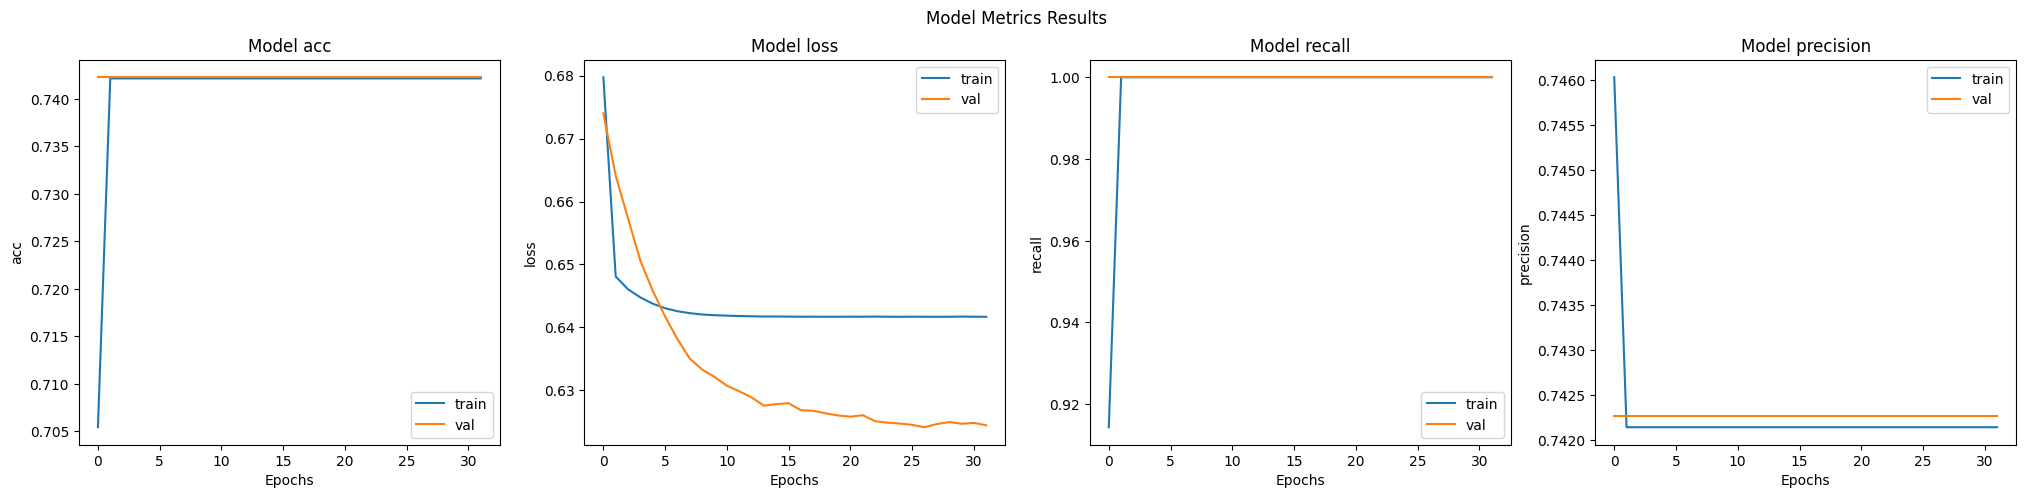

In [163]:
print("Model 8 w/o augmented data :\n")
eval_metrics(history9)

In [166]:
train_labels, train_predictions = predict_results(model_8,train_gen)
val_labels, val_predictions = predict_results(model_8,val_gen)

1/1 [==============================] - 0s 15ms/step


Training Confusion Matrices:



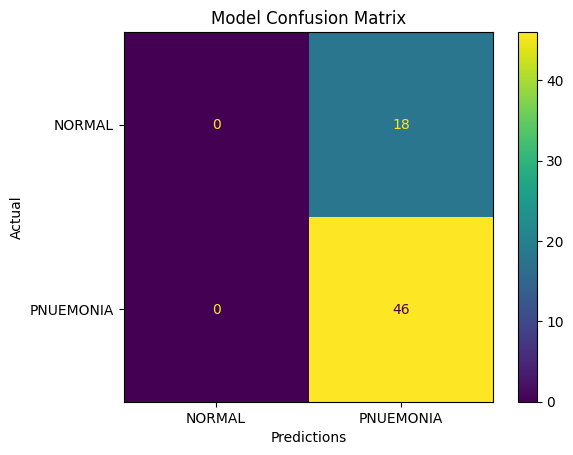

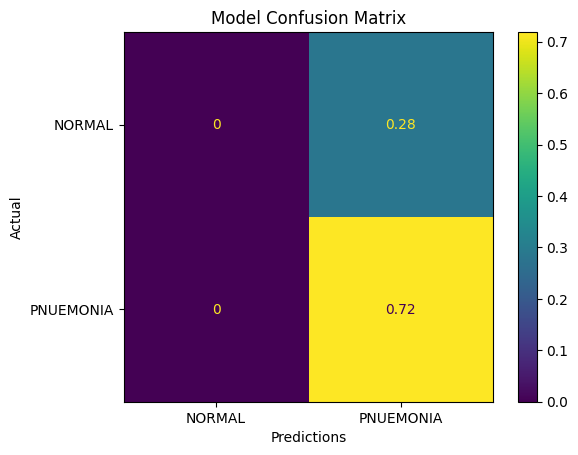

Validation Confusion Matrices:



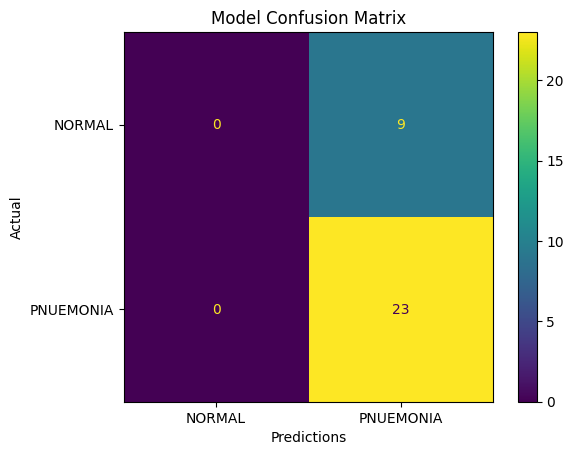

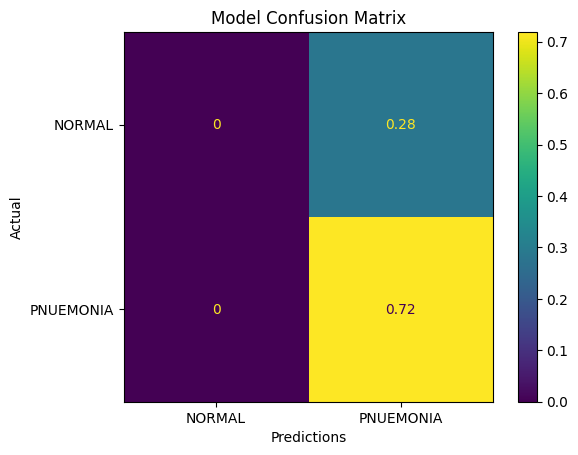

In [167]:
#Printing regular and normalized Confusion Matrices
print("Training Confusion Matrices:\n")
conf_matrix(train_labels,train_predictions, None)
conf_matrix(train_labels,train_predictions, "all")
print("Validation Confusion Matrices:\n")
conf_matrix(val_labels, val_predictions, None)
conf_matrix(val_labels, val_predictions, "all")

In [168]:
#Training Classification Report
print("Training Classificaiton Report:\n")
eval_report(train_labels,train_predictions,train_gen,history9)

Training Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.72      1.00      0.84        46

    accuracy                           0.72        64
   macro avg       0.36      0.50      0.42        64
weighted avg       0.52      0.72      0.60        64



69/69 [==============================] - 26s 373ms/step - loss: 0.6245 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421
Loss: 0.6245033740997314


In [169]:
#Training Classification Report
print("Validation Classificaiton Report:\n")
eval_report(val_labels,val_predictions,val_gen,history9)

Validation Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.72      1.00      0.84        23

    accuracy                           0.72        32
   macro avg       0.36      0.50      0.42        32
weighted avg       0.52      0.72      0.60        32



28/28 [==============================] - 5s 180ms/step - loss: 0.6245 - acc: 0.7423 - recall: 1.0000 - precision: 0.7423
Loss: 0.6244602203369141



### Fine Tuning

Removing a layer

In [177]:
model_9 = model_8
cnn_base_tuned = cnn_base

In [178]:
model_9.summary()


Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_132 (Flatten)       (None, 25088)             0         
                                                                 
 dense_309 (Dense)           (None, 132)               3311748   
                                                                 
 dense_310 (Dense)           (None, 1)                 133       
                                                                 
Total params: 23,336,265
Trainable params: 3,311,881
Non-trainable params: 20,024,384
_________________________________________________________________


In [173]:
cnn_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
cnn_base_tuned.trainable = True

In [179]:
cnn_base_tuned.trainable = True
set_trainable = False
for layer in cnn_base_tuned.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [180]:
model_9.compile(loss='binary_crossentropy',
                    optimizer= "adam",
                    metrics=["acc","Recall","Precision"]
                     )

In [181]:
history10 = model_9.fit(train_gen,batch_size=64,
                       epochs=65,
                       verbose = 2,
                       class_weight=class_weights,
                       validation_data=val_gen, 
                      callbacks = es) #stopping early because of time resources

Epoch 1/65


2023-03-26 23:15:06.628794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-26 23:15:34.891594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/69 - 35s - loss: 0.6417 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421 - val_loss: 0.6251 - val_acc: 0.7423 - val_recall: 1.0000 - val_precision: 0.7423 - 35s/epoch - 507ms/step
Epoch 2/65
69/69 - 33s - loss: 0.6417 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421 - val_loss: 0.6248 - val_acc: 0.7423 - val_recall: 1.0000 - val_precision: 0.7423 - 33s/epoch - 479ms/step
Epoch 3/65
69/69 - 34s - loss: 0.6417 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421 - val_loss: 0.6246 - val_acc: 0.7423 - val_recall: 1.0000 - val_precision: 0.7423 - 34s/epoch - 487ms/step
Epoch 4/65
69/69 - 33s - loss: 0.6417 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421 - val_loss: 0.6246 - val_acc: 0.7423 - val_recall: 1.0000 - val_precision: 0.7423 - 33s/epoch - 480ms/step
Epoch 5/65
69/69 - 34s - loss: 0.6417 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421 - val_loss: 0.6244 - val_acc: 0.7423 - val_recall: 1.0000 - val_precision: 0.7423 - 34s/epoch - 495ms/step
Epoch 6/65
69/69 - 33s - loss: 

Model 8 w/o augmented data :



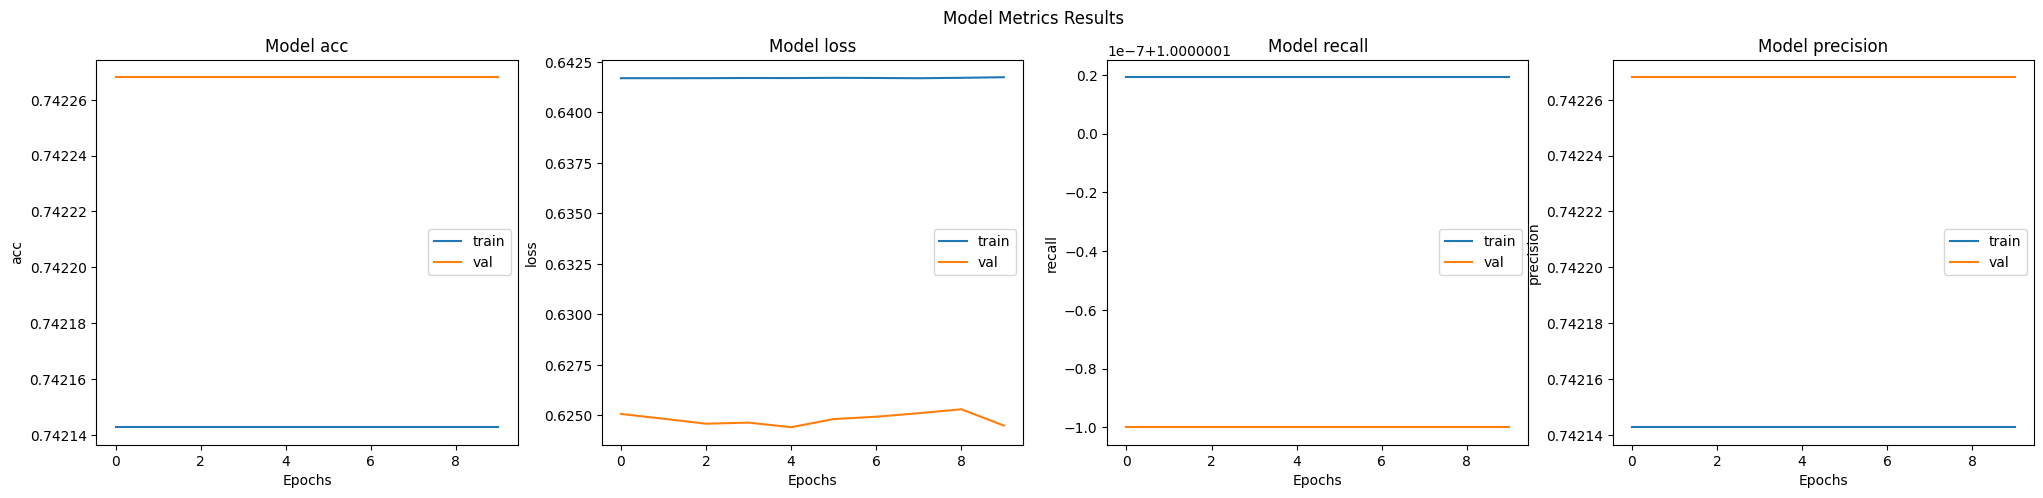

In [183]:
print("Model 9 w/o augmented data :\n")
eval_metrics(history10)

In [184]:
train_labels, train_predictions = predict_results(model_9,train_gen)
val_labels, val_predictions = predict_results(model_9,val_gen)

2023-03-26 23:29:41.451298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 94ms/step


Training Confusion Matrices:



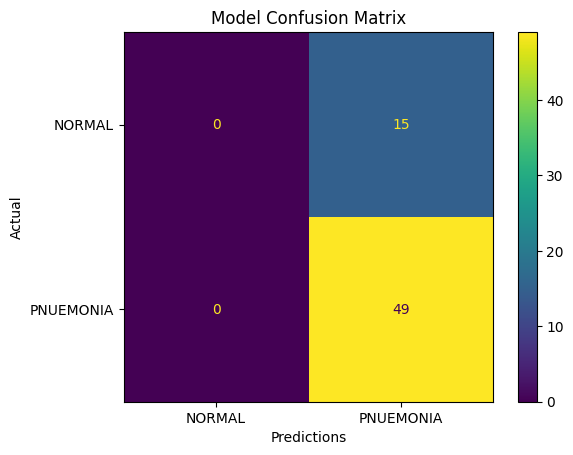

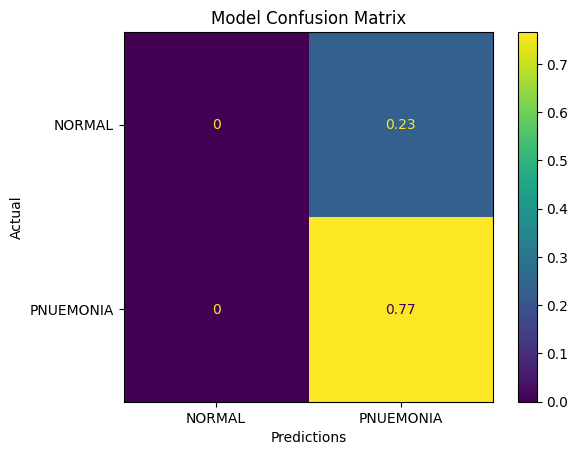

Validation Confusion Matrices:



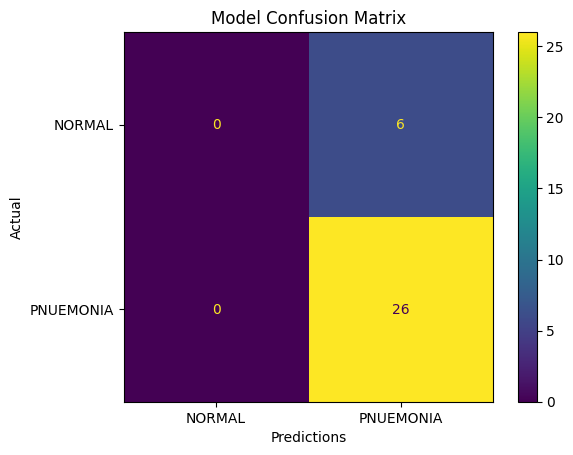

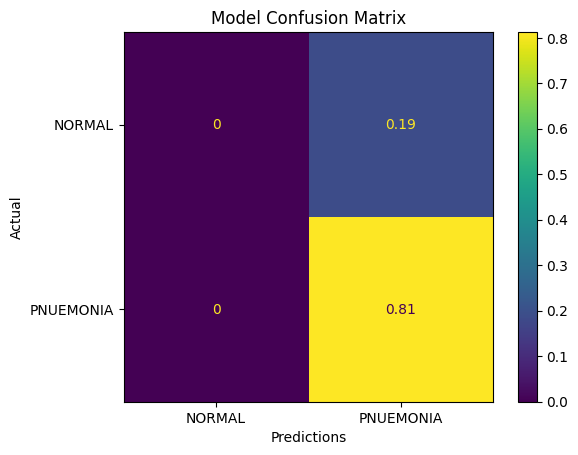

In [185]:
#Printing regular and normalized Confusion Matrices
print("Training Confusion Matrices:\n")
conf_matrix(train_labels,train_predictions, None)
conf_matrix(train_labels,train_predictions, "all")
print("Validation Confusion Matrices:\n")
conf_matrix(val_labels, val_predictions, None)
conf_matrix(val_labels, val_predictions, "all")

In [186]:
#Training Classification Report
print("Training Classificaiton Report:\n")
eval_report(train_labels,train_predictions,train_gen,history10)

Training Classificaiton Report:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.77      1.00      0.87        49

    accuracy                           0.77        64
   macro avg       0.38      0.50      0.43        64
weighted avg       0.59      0.77      0.66        64



69/69 [==============================] - 24s 339ms/step - loss: 0.6245 - acc: 0.7421 - recall: 1.0000 - precision: 0.7421
Loss: 0.6245408058166504


In [ ]:
#Training Classification Report
print("Validation Classificaiton Report:\n")
eval_report(val_labels,val_predictions,val_gen,history10)

In [ ]:
# Lime

In [218]:
from lime import lime_image

numpy.ndarray

In [ ]:
http://127.0.0.1:8889/notebooks/Ref/dsc-phase-4-project-master_tiaplagata/Phase4_Final_Notebook.ipynb

In [265]:
def img_array_pred(y_label, X_image_array,model,num):
    """ Inputing the data set and model to retrieve a random image and prediciton results"""

    #num = np.random.randint(0,20) If want to later generate random pictures
    
    label = y_label[num]
    img = X_image_array[num]

    # Get Model Prediction
    pred = model.predict(np.array([img]))
    pred_round = np.round(pred,1)

    # Print True and Predicted Image
    if pred_round == 0:
        print('Image is Normal (0)!')
    else:
        print('Image is Pneumonia (1)')

    if label == 0:
        print('Image predicted as Normal (0)!')
    else:
        print('Image predicted as Pneumonia (1)!')

    print (f"Image Index {num} was chosen.")    
    
    return array_to_img(img)

1/1 [==============================] - 0s 11ms/step
Image is Pneumonia (1)
Image predicted as Pneumonia (1)!
Image Index 4 was chosen.


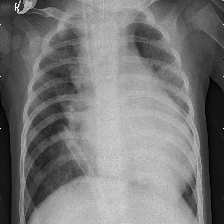

In [306]:
img = img_array_pred(y_train, X_train,model_5,4 )
img

In [219]:
explainer = lime_image.LimeImageExplainer()

In [322]:
explanation = explainer.explain_instance(X_train[4].astype('double'), model_5.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000,)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 9ms/step


In [323]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=15, hide_rest=False)

(-0.5, 223.5, 223.5, -0.5)

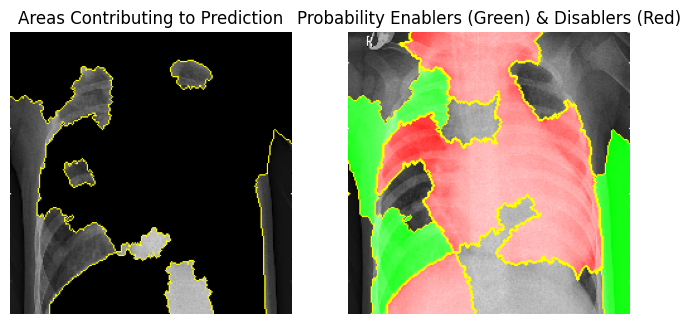

In [324]:
fig, axes = plt.subplots(1,2,figsize=(8,8))
axes[0].imshow(mark_boundaries(temp_1, mask_1))
axes[0].set_title("Areas Contributing to Prediction")
axes[1].imshow(mark_boundaries(temp_2, mask_2))
axes[1].set_title("Probability Enablers (Green) & Disablers (Red)")
axes[0].axis('off')
axes[1].axis('off')
#plt.savefig('Lime_TP.png')

In [ ]:
# Number 2 Find a False Negative

1/1 [==============================] - 0s 10ms/step
Image is Pneumonia (1)
Image predicted as Normal (0)!
Image Index 2 was chosen.


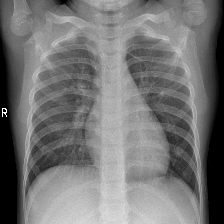

In [295]:
img2 = img_array_pred(y_train, X_train,model_5,2 )
img2

In [316]:
explainer = lime_image.LimeImageExplainer()
explanation2 = explainer.explain_instance(X_train[2].astype
                                          ("double"), model_5.predict,  
                                         top_labels=3, hide_color=None, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 10ms/step


In [317]:

temp_1, mask_1 = explanation2.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
temp_2, mask_2 = explanation2.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=15, hide_rest=False)

(-0.5, 223.5, 223.5, -0.5)

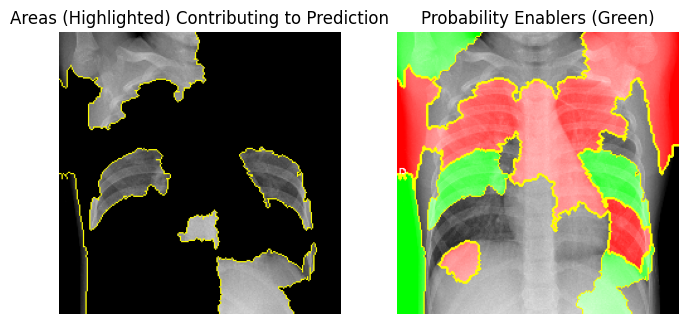

In [318]:
fig, axes = plt.subplots(1,2,figsize=(8,8))
axes[0].imshow(mark_boundaries(temp_1, mask_1))
axes[0].set_title("Areas (Highlighted) Contributing to Prediction")
axes[1].imshow(mark_boundaries(temp_2, mask_2))
axes[1].set_title("Probability Enablers (Green) & Disablers (Red)")
axes[0].axis('off')
axes[1].axis('off')
#plt.savefig('Lime_FN.png')

In [ ]:
# Evaluation

In [ ]:
#FInal Model

In [ ]:
# Model 8 - Transfer Function